<a href="https://colab.research.google.com/github/JoDeMiro/Statistics/blob/main/Stat_for_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statisztikai mérések a MiCado Optimizerhez

Az adatok a JoDeMiro repositoriumból letölthetőek.

https://github.com/JoDeMiro/Data/tree/main/Micado

### Kötelező olvasmány mielött belekezdenél és publikációhoz is

https://sci2s.ugr.es/keel/pdf/algorithm/articulo/dietterich1998.pdf


```
# Approximate Statistical Tests for Comparing
  Supervised Classification Learning Algorithms

  Thomas G. Dietterich
  December 30, 1997
```

### Kiegészítő olvasmányok

<a href="https://hu.wikipedia.org/wiki/Kovariancia">Covariancia</a>

<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson correlation coefficient</a>

<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">A megmagyarázott hányad és Pearsons R2 közötti kapcsolat</a>

<a href="http://rs1.szif.hu/~szorenyi/elm/bioselm7.htm">A Pearsons-féle korrelációhoz tartozó statinsztikai próba</a>

<a href="https://en.wikipedia.org/wiki/Moment_(mathematics)">Az eloszlásfüggvények momemntumai</a>


In [101]:
  !pip install scikit-learn==0.24.2

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

import pickle
import warnings
warnings.filterwarnings('ignore')

In [103]:
!wget https://raw.githubusercontent.com/JoDeMiro/Data/main/Micado/nn_training_data.csv

--2022-01-28 17:07:30--  https://raw.githubusercontent.com/JoDeMiro/Data/main/Micado/nn_training_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156914 (153K) [text/plain]
Saving to: ‘nn_training_data.csv.1’

nn_training_data.cs 100%[===================>] 153.24K  --.-KB/s    in 0.01s   

2022-01-28 17:07:30 (10.9 MB/s) - ‘nn_training_data.csv.1’ saved [156914/156914]



In [104]:
df = pd.read_csv('nn_training_data.csv')

In [105]:
df.head()

timestamp     PktIn      KBIn  ...    PktOut  vm_number  AVG_LAT_05
0  1571923606  0.291658  0.029784  ...  0.241660          5      466.25
1  1571923621  0.300010  0.030584  ...  0.250011          5      457.25
2  1571923637  0.275005  0.029102  ...  0.291673          5      433.25
3  1571923652  0.275002  0.029330  ...  0.241668          5      410.25
4  1571923683  0.300004  0.030583  ...  0.250001          5      429.25

[5 rows x 12 columns]

In [106]:
X = df[['PktIn', 'PktOut', 'KBIn', 'KBOut', 'Inter', 'CTXSW', 'CPU', 'AVG_RR']]

X.head()

PktIn    PktOut      KBIn  ...        CTXSW        CPU     AVG_RR
0  0.291658  0.241660  0.029784  ...  3359.291450  53.500884  16.015706
1  0.300010  0.250011  0.030584  ...  3273.530409  54.386839  17.872610
2  0.275005  0.291673  0.029102  ...  3250.338397  52.858070  17.781137
3  0.275002  0.241668  0.029330  ...  3296.357451  51.445648  17.768750
4  0.300004  0.250001  0.030583  ...  3333.359290  53.043713  17.893865

[5 rows x 8 columns]

## Leíró statisztikák

In [107]:
X.describe()

PktIn      PktOut        KBIn  ...         CTXSW         CPU      AVG_RR
count  900.000000  900.000000  900.000000  ...    900.000000  900.000000  900.000000
mean     0.281103    0.239509    0.029469  ...   3095.583565   37.262589   15.040358
std      0.016246    0.018822    0.000835  ...   1076.489579   14.487499    6.940871
min      0.249979    0.199993    0.028026  ...   1151.625000    1.937500    0.000000
25%      0.270006    0.225005    0.028918  ...   2470.325207   31.551272   10.342845
50%      0.280000    0.237500    0.029394  ...   3082.632222   39.951490   16.099732
75%      0.290059    0.250000    0.029958  ...   3545.723749   47.989894   21.338542
max      0.400004    0.300006    0.036263  ...  10181.769327   69.287500   23.500000

[8 rows x 8 columns]

## Timeline

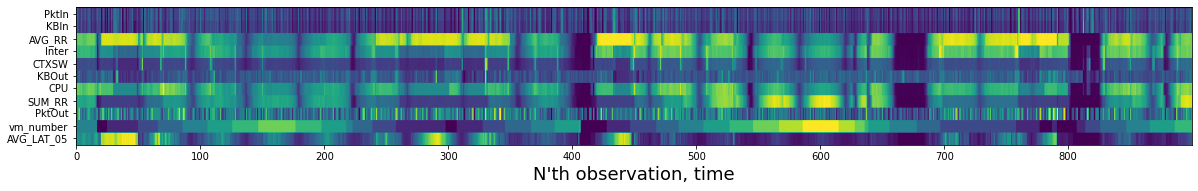

In [108]:
X = df.values

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

h = np.zeros((1, df.shape[0]))

for i, v in enumerate(df.columns):
  if( v != 'timestamp'):
    col = X_scaled[:,i]
    size = col.size
    col = col.reshape((1, col.size))
    col = col.T
    col = col.repeat(10, axis=0)
    col = col.reshape((size, 10))
    h = np.concatenate((h, col.T), axis=0)

# print(df.columns)
print('')
labels = df.columns[1:]
y = np.arange(5, 115, 10)
plt.figure(figsize=(20, 7))
plt.imshow(h)
plt.yticks(y, labels, rotation='horizontal')
plt.xlabel('N\'th observation, time', fontsize=18)
plt.show()

In [109]:
# gyors testzek a változókra

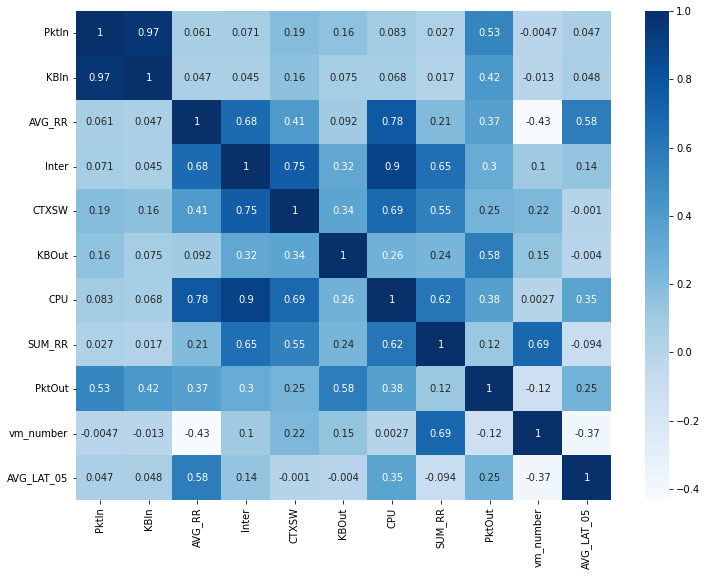

In [110]:
# korrelácó az egyes változók között
corr = df.iloc[: , 1:].corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.savefig('correlation_matrix1.png')
plt.show()

## Pearsons féle korreláció és hozzá tartozó p. érték

Ezt minden változópárra ki kell számolnom.

In [111]:
import scipy

scipy.stats.pearsonr(df['AVG_RR'], df['CPU'])

(0.7755417008895121, 1.395516854288729e-181)

## Correlációs mátrix

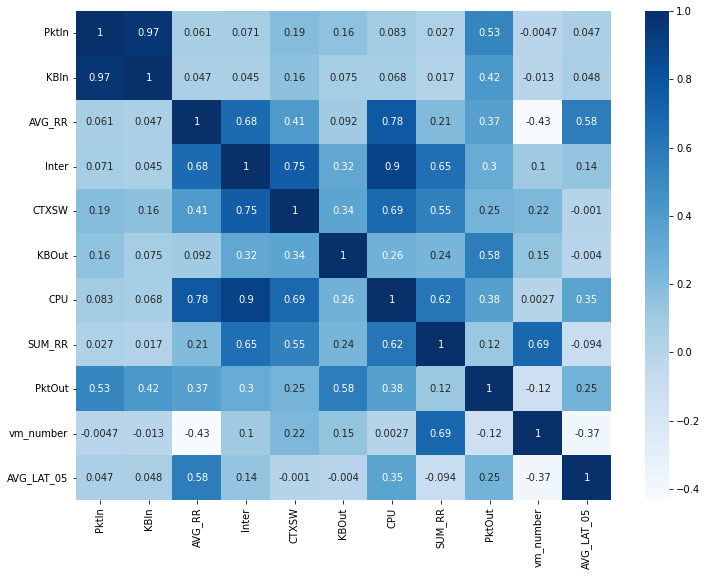

In [112]:
# korrelácó az egyes változók között
corr = df.iloc[: , 1:].corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.savefig('correlation_matrix.png')
plt.show()

## Idővonal

In [113]:
def timeline(variable, var_name, label):
  plt.figure(figsize=(20,4))
  plt.plot(variable, label=label)
  plt.ylabel(var_name, fontsize=18)
  plt.xlabel('N\'th observation, time', fontsize=18)
  plt.legend(fontsize=14, frameon=False)
  plt.show()

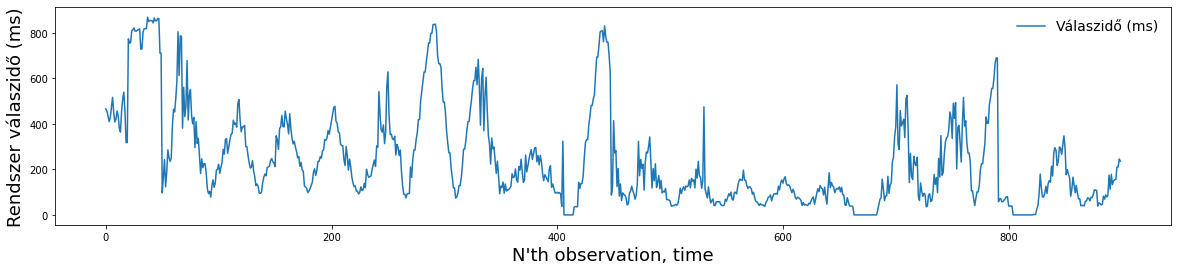

In [114]:
timeline(df['AVG_LAT_05'], 'Rendszer válaszidő (ms)', 'Válaszidő (ms)')

# df = df[df['AVG_LAT_05'] < 20000]
# timeline(df['AVG_LAT_05'])

No handles with labels found to put in legend.


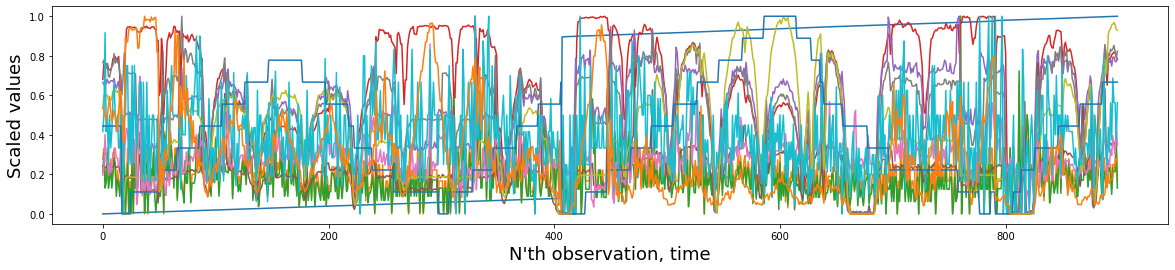

In [115]:
from sklearn.preprocessing import MinMaxScaler

df_scaler = MinMaxScaler((0,1))
df_scaled = df_scaler.fit_transform(df)

timeline(df_scaled, 'Scaled values', '')

No handles with labels found to put in legend.


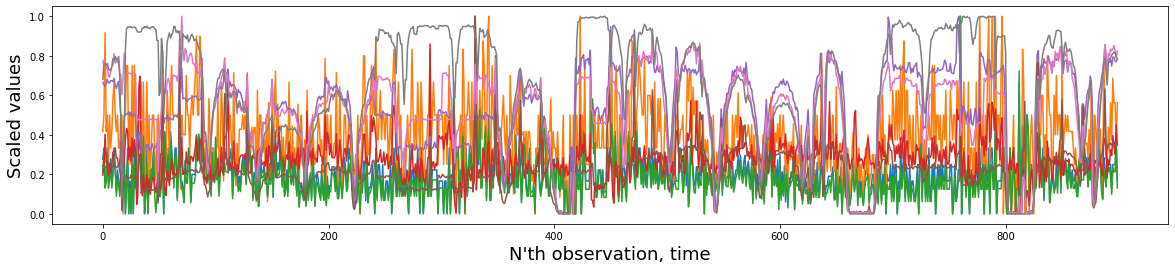

In [116]:
from sklearn.preprocessing import MinMaxScaler

X = df[['PktIn', 'PktOut', 'KBIn', 'KBOut', 'Inter', 'CTXSW', 'CPU', 'AVG_RR']]

X_scaler = MinMaxScaler((0,1))
X_scaled = df_scaler.fit_transform(X)

timeline(X_scaled, 'Scaled values', '')

# Before After vizsgálatok

In [117]:
# Keressük meg azokat az adatokat ahol változott a gépek száma

In [118]:
def createBeforeafterDF(df, lag, inputMetrics):
    beforeafterDF = df.copy()
    length = len(inputMetrics)
    # print(length)
    inputVariables = np.flip(beforeafterDF.columns[0:length].ravel(), axis=-1)
    # print('Input Variablels : ', inputVariables)

    index = length
    for i in inputVariables:
        new_column = beforeafterDF[i].shift(lag)
        new_column_name = (i + str(1)) # Todo: rename str(lag)
        beforeafterDF.insert(loc=index, column=new_column_name, value=new_column)

    beforeafterDF = beforeafterDF[lag:]

    return beforeafterDF

# Fontos
metrics = df.columns

# Before After adatok egy sorban
ba = createBeforeafterDF(df, 1, metrics)

# Csak azok az adatok ahol tényleges eltérés volt a gépek száma között
def createScalingDF(theBeforeAfterDF):
  new_beforeafterDF = theBeforeAfterDF.copy()
  scalingDF = new_beforeafterDF[new_beforeafterDF.vm_number != new_beforeafterDF.vm_number1]
  return scalingDF

fd = createScalingDF(ba)

rossz = fd.copy()

# Ki kell szűrni azokat az eseteket, ahol egynél több gépet adott hozzá, vagy vett el
fd['difference'] = fd['vm_number']-fd['vm_number1']
fd['abs_difference'] = abs(fd['difference'])
fd = fd[fd['abs_difference'] < 2]

print(fd.shape)

(46, 26)


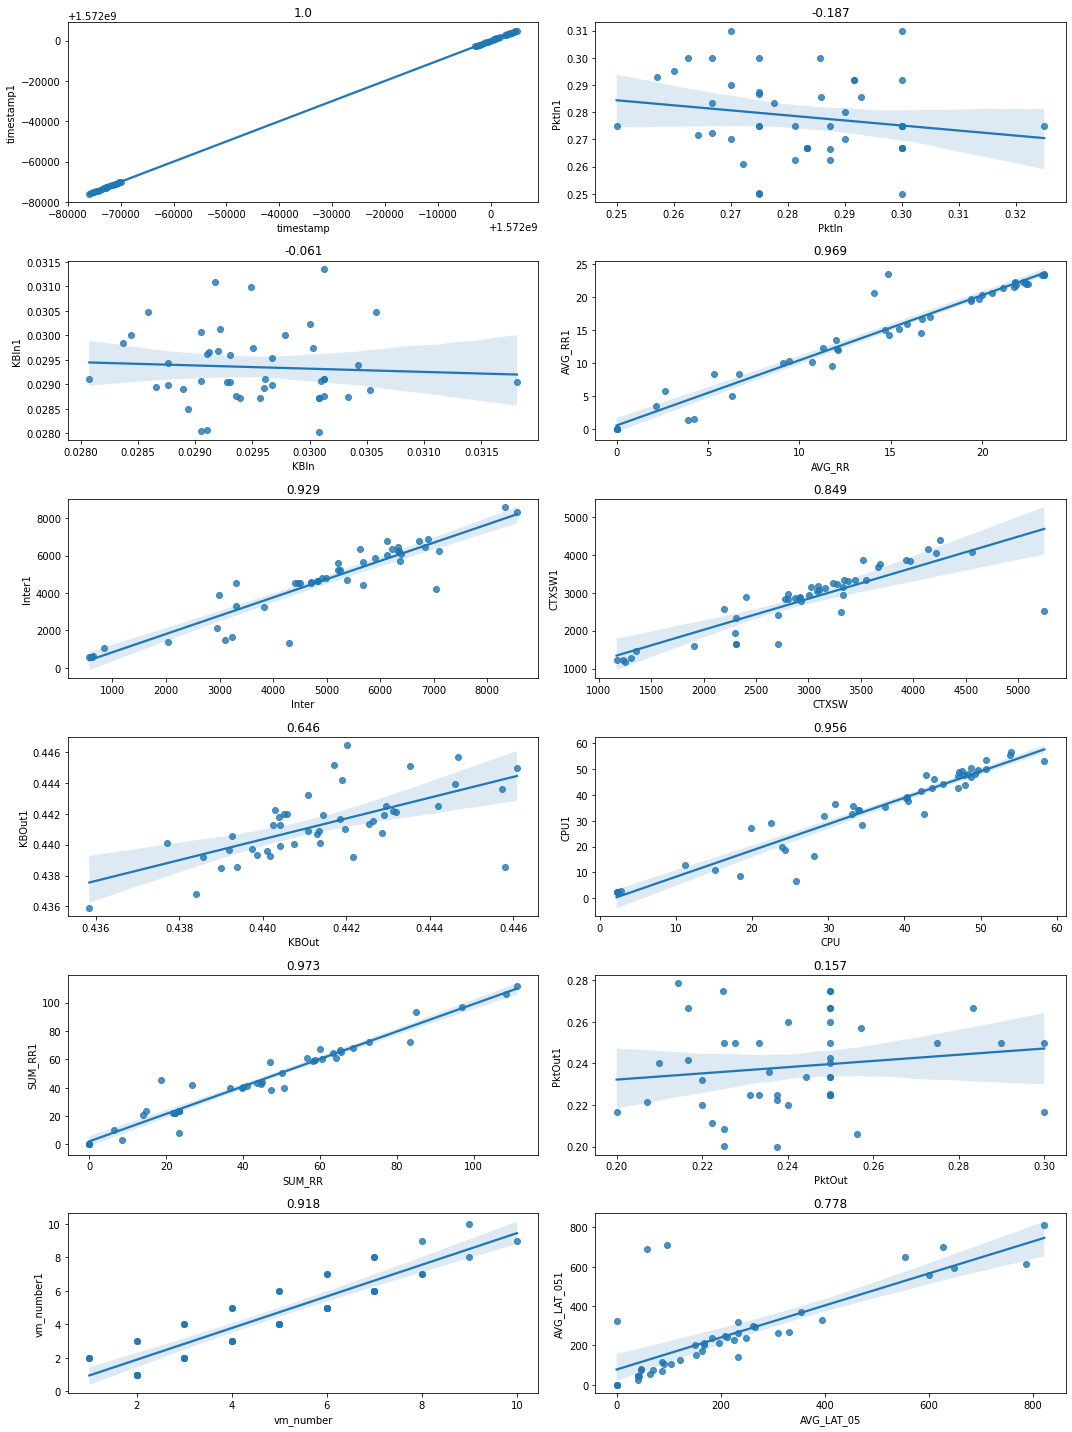

In [119]:
# Most nézzük meg, hogy milyen korreláció van az egyes before after változók között

fig, axes = plt.subplots(6, 2, figsize=(15, 20), sharey=False)
for j, i in enumerate(df.columns):
  corr = str(round(fd[i].corr(fd[i+'1']), 3))

  r = int(j/2)
  c = 1 if (j % 2 == 1) else 0
  sns.regplot(ax=axes[r, c], x = fd[i], y = fd[i+'1']).set_title(corr)

plt.tight_layout()
plt.show()

r2  =  0.9130603783494109
r2w =  0.913060378349411


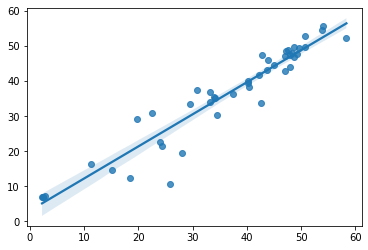

In [120]:
# Regresszió

y = fd['CPU'].values          # Current
x = fd['CPU1'].values         # Lag
x = x.reshape(-1,1)

regression = LinearRegression()

regression.fit(x,y)

y_pred = regression.predict(x)

r2  = r2_score(y, y_pred)
r2w = r2_score(y, y_pred, multioutput='variance_weighted')

print('r2  = ', r2)
print('r2w = ', r2w)

sns.regplot(y, y_pred)
plt.show()

In [121]:
fd.head()

timestamp     PktIn      KBIn  ...  AVG_LAT_051  difference  abs_difference
25   1571924040  0.250000  0.028076  ...   814.000000         1.0             1.0
50   1571924427  0.266667  0.028760  ...   711.000000         1.0             1.0
66   1571924676  0.262500  0.028589  ...   613.000000         1.0             1.0
86   1571925002  0.300003  0.030127  ...   246.666667         1.0             1.0
106  1571925313  0.291670  0.029786  ...   267.250000         1.0             1.0

[5 rows x 26 columns]

r2_old  =  0.9211204911655055 	 r2w_old =  0.9211204911655055
r2_new  =  0.9131056356208895 	 r2w_new =  0.9131056356208895


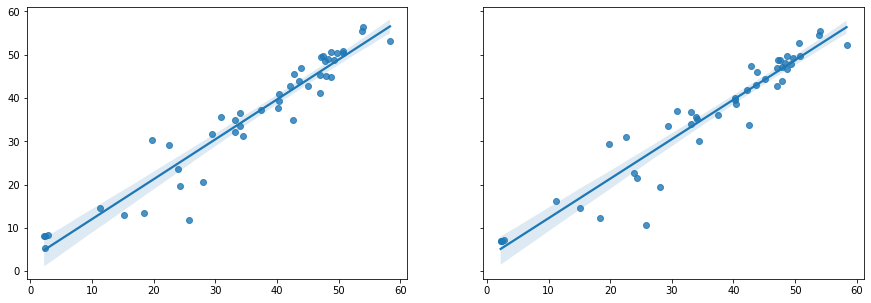

In [122]:
# Regresszió

# A 'vm_number' változót is figyelembe vesszük

y     = fd['CPU'].values          # Current
x_old = fd[['CPU1', 'vm_number1', 'difference']].values
x_new = fd[['CPU1', 'PktIn1', 'KBIn1', 'AVG_RR1', 'Inter1', 'CTXSW1', 'KBOut1', 'KBOut1', 'SUM_RR1', 'PktOut1', 'vm_number1', 'AVG_LAT_051']].values

x_new = fd[['CPU1', 'PktIn1']].values

regression = LinearRegression()

# fit old
regression.fit(x_old, y)
y_pred_old = regression.predict(x_old)
r2_old  = r2_score(y, y_pred_old)
r2w_old = r2_score(y, y_pred_old, multioutput='variance_weighted')

# fit new
regression.fit(x_new, y)
y_pred_new = regression.predict(x_new)
r2_new  = r2_score(y, y_pred_new)
r2w_new = r2_score(y, y_pred_new, multioutput='variance_weighted')


print('r2_old  = ', r2_old, '\t', 'r2w_old = ', r2w_old)
print('r2_new  = ', r2_new, '\t', 'r2w_new = ', r2w_new)


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.regplot(ax=axes[0], x = y, y = y_pred_old)
sns.regplot(ax=axes[1], x = y, y = y_pred_new)
plt.show()

timestamp
r2_old  =  0.9999992516679015 	 r2w_old =  0.9999992516679015
r2_lat  =  0.4462655887460021 	 r2w_lat =  0.4462655887460021
r2_new  =  0.5420109630020147 	 r2w_new =  0.5420109630020147


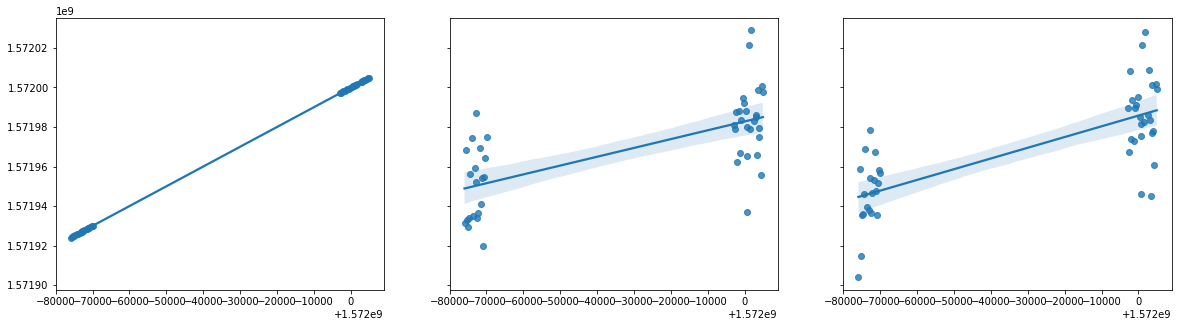

PktIn
r2_old  =  0.10705442505705887 	 r2w_old =  0.10705442505705887
r2_lat  =  0.34146768318633003 	 r2w_lat =  0.34146768318633003
r2_new  =  0.3910216059652205 	 r2w_new =  0.3910216059652205


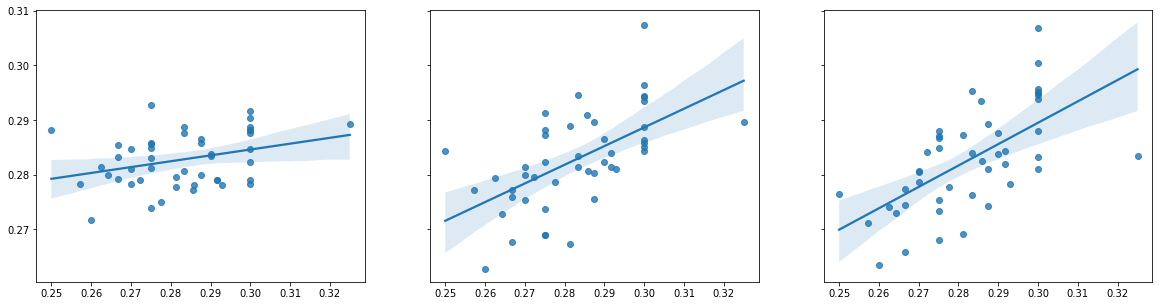

KBIn
r2_old  =  0.08974145580582782 	 r2w_old =  0.08974145580582782
r2_lat  =  0.2884613409819412 	 r2w_lat =  0.2884613409819412
r2_new  =  0.3124750536556792 	 r2w_new =  0.3124750536556792


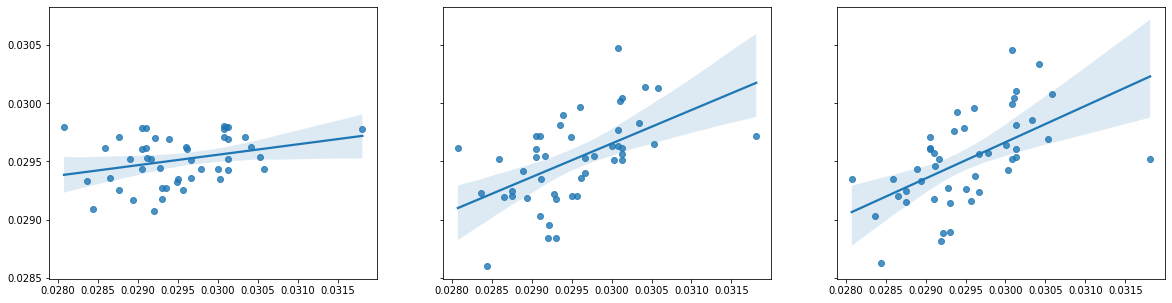

AVG_RR
r2_old  =  0.9476628615627488 	 r2w_old =  0.9476628615627488
r2_lat  =  0.9629925184328042 	 r2w_lat =  0.9629925184328043
r2_new  =  0.9646396758488164 	 r2w_new =  0.9646396758488164


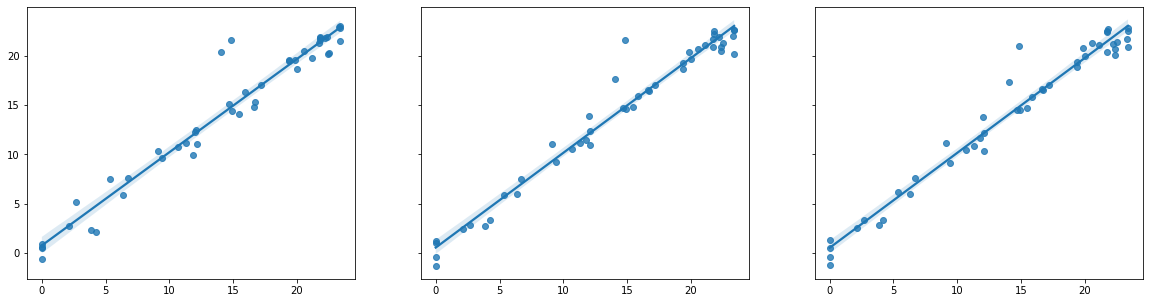

Inter
r2_old  =  0.865901238436938 	 r2w_old =  0.865901238436938
r2_lat  =  0.8914325304998093 	 r2w_lat =  0.8914325304998093
r2_new  =  0.8936824407594071 	 r2w_new =  0.8936824407594071


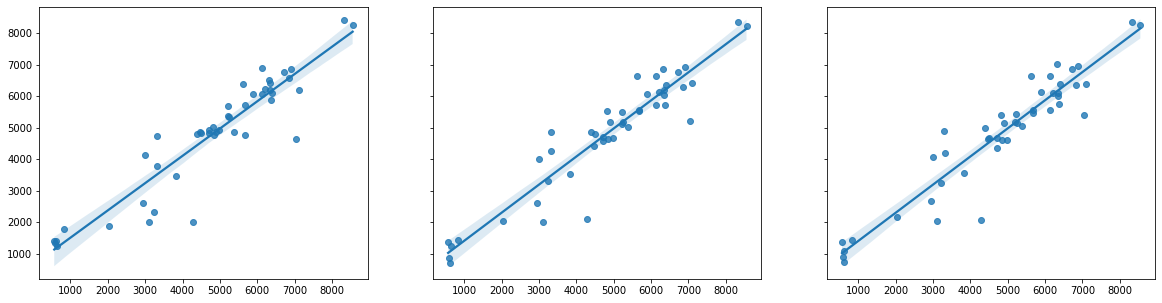

CTXSW
r2_old  =  0.7242471911087963 	 r2w_old =  0.7242471911087963
r2_lat  =  0.8035543286795042 	 r2w_lat =  0.8035543286795042
r2_new  =  0.8054839786666157 	 r2w_new =  0.8054839786666157


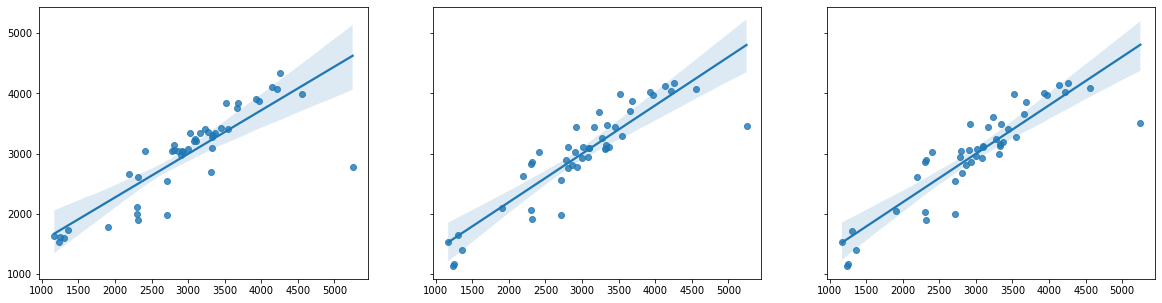

KBOut
r2_old  =  0.5767717516312963 	 r2w_old =  0.5767717516312963
r2_lat  =  0.7532081362490397 	 r2w_lat =  0.7532081362490398
r2_new  =  0.7708709111488791 	 r2w_new =  0.7708709111488791


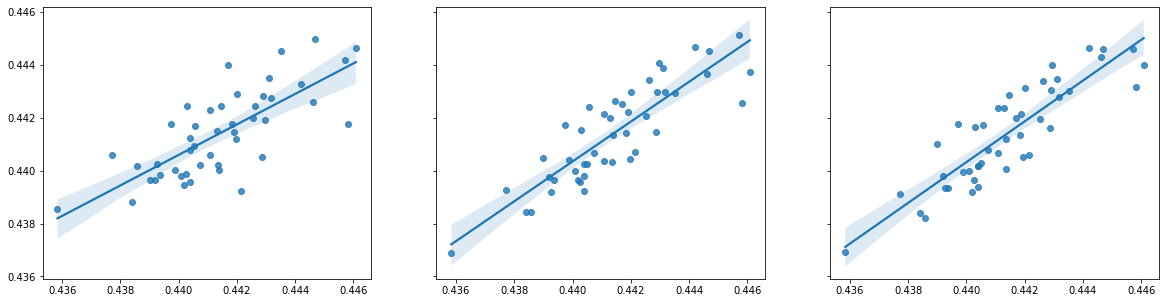

CPU
r2_old  =  0.9211204911655055 	 r2w_old =  0.9211204911655055
r2_lat  =  0.9392319836476576 	 r2w_lat =  0.9392319836476576
r2_new  =  0.9392324247754388 	 r2w_new =  0.9392324247754388


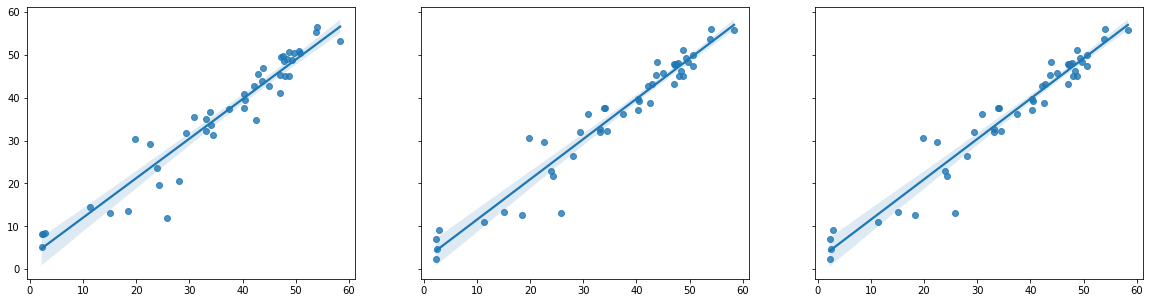

SUM_RR
r2_old  =  0.9582875583310523 	 r2w_old =  0.9582875583310523
r2_lat  =  0.9769662684077801 	 r2w_lat =  0.9769662684077801
r2_new  =  0.9772262753472183 	 r2w_new =  0.9772262753472184


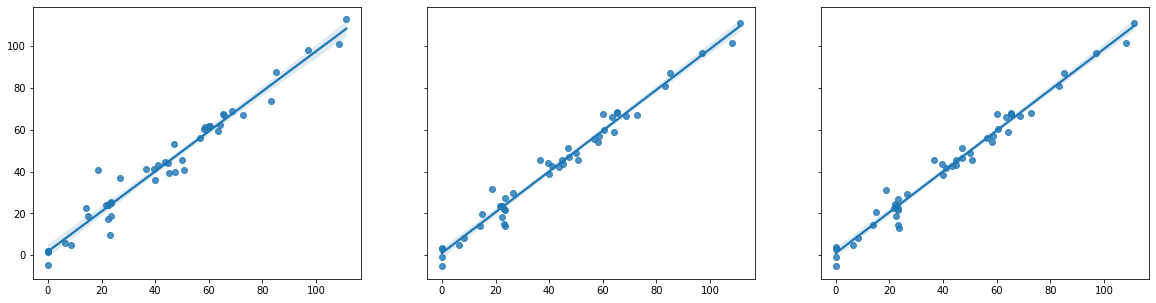

PktOut
r2_old  =  0.18778127550405532 	 r2w_old =  0.18778127550405532
r2_lat  =  0.5002717790882818 	 r2w_lat =  0.5002717790882818
r2_new  =  0.5323782713862962 	 r2w_new =  0.5323782713862962


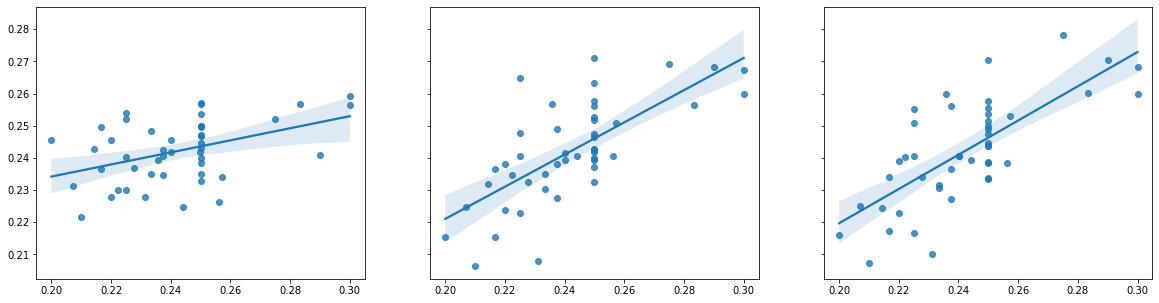

vm_number
r2_old  =  1.0 	 r2w_old =  1.0
r2_lat  =  1.0 	 r2w_lat =  1.0
r2_new  =  1.0 	 r2w_new =  1.0


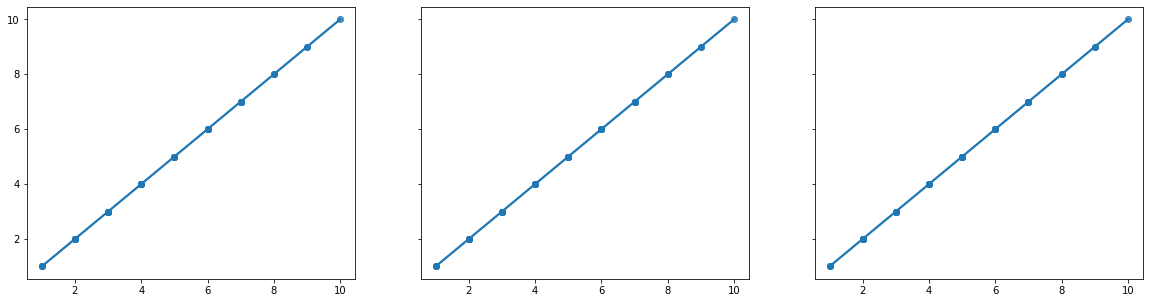

AVG_LAT_05
r2_old  =  0.6133918475071771 	 r2w_old =  0.6133918475071771
r2_lat  =  0.498189142729043 	 r2w_lat =  0.498189142729043
r2_new  =  0.6785585221690495 	 r2w_new =  0.6785585221690495


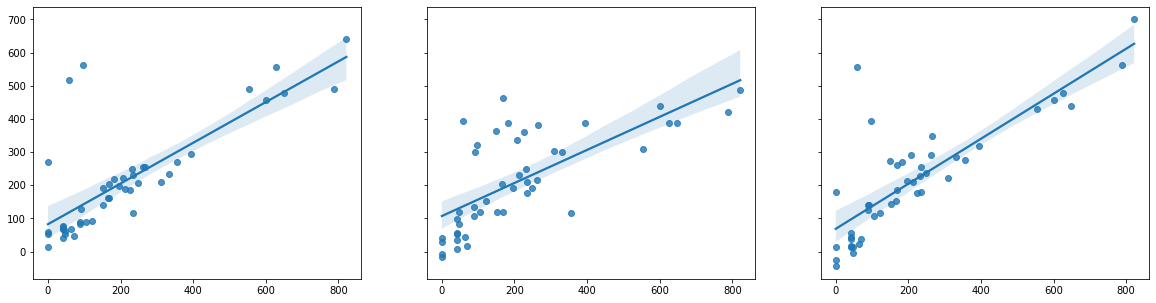

In [123]:
# Regresszió
for i in df.columns:
  y     = fd[i].values               # Current
  x_old = fd[[str( i + '1' ), 'vm_number1', 'difference']].values
  x_new = fd[['CPU1', 'PktIn1', 'KBIn1', 'AVG_RR1', 'Inter1', 'CTXSW1', 'KBOut1', 'KBOut1', 'SUM_RR1', 'PktOut1', 'vm_number1', 'difference', 'AVG_LAT_051']].values
  x_lat = fd[['CPU1', 'PktIn1', 'KBIn1', 'AVG_RR1', 'Inter1', 'CTXSW1', 'KBOut1', 'KBOut1', 'SUM_RR1', 'PktOut1', 'vm_number1', 'difference']].values


  regression = LinearRegression()

  # fit old
  regression.fit(x_old, y)
  y_pred_old = regression.predict(x_old)
  r2_old  = r2_score(y, y_pred_old)
  r2w_old = r2_score(y, y_pred_old, multioutput='variance_weighted')

  # fit new
  regression.fit(x_new, y)
  y_pred_new = regression.predict(x_new)
  r2_new  = r2_score(y, y_pred_new)
  r2w_new = r2_score(y, y_pred_new, multioutput='variance_weighted')

  # fit without latency
  regression.fit(x_lat, y)
  y_pred_lat = regression.predict(x_lat)
  r2_lat  = r2_score(y, y_pred_lat)
  r2w_lat = r2_score(y, y_pred_lat, multioutput='variance_weighted')



  print(i)
  print('r2_old  = ', r2_old, '\t', 'r2w_old = ', r2w_old)
  print('r2_lat  = ', r2_lat, '\t', 'r2w_lat = ', r2w_lat)
  print('r2_new  = ', r2_new, '\t', 'r2w_new = ', r2w_new)


  fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
  sns.regplot(ax=axes[0], x = y, y = y_pred_old)
  sns.regplot(ax=axes[1], x = y, y = y_pred_lat)
  sns.regplot(ax=axes[2], x = y, y = y_pred_new)
  # plt.savefig('before_after.png')
  plt.show()

## # NN, a request rate nélkül

In [124]:
df.columns

Index(['timestamp', 'PktIn', 'KBIn', 'AVG_RR', 'Inter', 'CTXSW', 'KBOut',
       'CPU', 'SUM_RR', 'PktOut', 'vm_number', 'AVG_LAT_05'],
      dtype='object')

In [125]:
columns = ['PktIn', 'KBIn', 'Inter', 'CTXSW', 'KBOut', 'CPU', 'PktOut']

X = df[columns].values
y = df['AVG_LAT_05']

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=1, shuffle=False)

activation_function = 'relu'        # tanh, relu, logistic

mlp = MLPRegressor(hidden_layer_sizes=(4,),
                           max_iter=1000,
                           activation=activation_function,
                           solver="lbfgs",
                           learning_rate="constant",
                           learning_rate_init=0.01,
                           alpha=0.01,
                           verbose=False,
                           momentum=0.9,
                           early_stopping=False,
                           tol=0.00000001,
                           shuffle=False,
                           n_iter_no_change=20,
                           random_state=1234)


mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test  = mlp.predict(X_test)

r2_train = np.corrcoef(y_train.ravel(), y_pred_train)[0,1]
r2_test  = np.corrcoef(y_test.ravel(), y_pred_test)[0,1]

print('r2 train = ', r2_train)
print('r2 test  = ', r2_test)

r2 train =  0.7565453965382479
r2 test  =  0.5865526073492766


## Helper függvények

In [126]:
#@title
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

def save_mlp(name):
  filename = name
  pickle.dump(mlp, open(filename, 'wb'))

def load_mlp(name):
  mlp = pickle.load(open(filename, 'rb'))
  return mlp

def timeline_plot(real, estimated):
  plt.figure(figsize=(20, 6))
  plt.plot(real, label = 'Real')
  plt.plot(estimated, label = 'Estimated')
  plt.title('Estimated vs Real values', fontsize=18)
  plt.ylabel('Average Latency - Normalized', fontsize=18)
  plt.xlabel('N\'th observation, time', fontsize=18)
  plt.legend(fontsize=14, frameon=False)
  plt.show()

def train_test_real_predicted_scatter(y_train, y_test, y_pred_train, y_pred_test):
  fig, (a1, a2) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
  a1.scatter(y_train, y_pred_train)
  a1.set_title('Training data', fontsize=18)
  a1.set_ylabel('Predicted', fontsize=18)
  a1.set_xlabel('Real value', fontsize=18)
  r2 = np.corrcoef(y_train.ravel(), y_pred_train.ravel())[0,1]
  a1.annotate('r2 = ' + str(round(r2, 3)), xy=(0.2, 0.8), xycoords='axes fraction', fontsize=18, ha='center', va='center')

  a2.scatter(y_test, y_pred_test)
  a2.set_title('Test data', fontsize=18)
  a2.set_ylabel('Predicted', fontsize=18)
  a2.set_xlabel('Real value', fontsize=18)
  r2 = np.corrcoef(y_test.ravel(), y_pred_test.ravel())[0,1]
  a2.annotate('r2 = ' + str(round(r2, 3)), xy=(0.2, 0.8), xycoords='axes fraction', fontsize=18, ha='center', va='center')
  plt.show()

def train_test_real_predicted_scatter_sns(y_train, y_test, y_pred_train, y_pred_test):
  fig, (a1, a2) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
  sns.regplot(ax=a1, x = y_train, y = y_pred_train)
  a1.set_title('Training data', fontsize=18)
  a1.set_ylabel('Predicted', fontsize=18)
  a1.set_xlabel('Real value', fontsize=18)
  a1.set_ylim(-0.05, 1.05)
  a1.set_xlim(-0.05, 1.05)
  r2 = np.corrcoef(y_train.ravel(), y_pred_train.ravel())[0,1]
  a1.annotate('r2 = ' + str(round(r2, 3)), xy=(0.2, 0.8), xycoords='axes fraction', fontsize=18, ha='center', va='center')

  sns.regplot(ax=a2, x = y_test, y = y_pred_test)
  a2.set_title('Test data', fontsize=18)
  a2.set_ylabel('Predicted', fontsize=18)
  a2.set_xlabel('Real value', fontsize=18)
  a2.set_ylim(-0.05, 1.05)
  a2.set_xlim(-0.05, 1.05)
  r2 = np.corrcoef(y_test.ravel(), y_pred_test.ravel())[0,1]
  a2.annotate('r2 = ' + str(round(r2, 3)), xy=(0.2, 0.8), xycoords='axes fraction', fontsize=18, ha='center', va='center')
  plt.show()

def cummulative_plots(errors, cummulative_errors, y_real, y_predicted):
  plt.figure(figsize=(20,4))
  plt.plot(errors, label='Error per estimation')
  plt.ylabel('Error', fontsize=18)
  plt.legend(fontsize=14, frameon=False)
  plt.show()

  plt.figure(figsize=(20,4))
  plt.plot(cummulative_errors, label='Cummulative error')
  plt.ylabel('Cumulative error', fontsize=18)
  plt.legend(fontsize=14, frameon=False)
  plt.show()

  plt.figure(figsize=(20,4))
  plt.plot(y_predicted, label='predicted')
  plt.plot(y_real, label='real')
  plt.ylabel('Average Latency', fontsize=18)
  plt.xlabel('N\'th observation, time', fontsize=18)
  plt.legend(fontsize=14, frameon=False)
  plt.show()

def cummaulative_real_predicted_scatter(y_real, y_predicted):
  plt.figure(figsize=(10, 7))
  plt.scatter(y_real, y_predicted)
  plt.title('Estimated vas Real data', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.xlabel('Real value', fontsize=18)
  r2 = np.corrcoef(y_real, y_predicted)[0,1]
  plt.annotate('r2 = ' + str(round(r2, 3)), xy=(0.8, 0.2), xycoords='axes fraction', fontsize=18, ha='center', va='center')
  plt.show()

def cummaulative_real_predicted_scatter_sns(y_real, y_predicted):
  plt.figure(figsize=(10, 7))
  sns.regplot(x = y_real, y = y_predicted)
  plt.title('Estimated vas Real data', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.xlabel('Real value', fontsize=18)
  plt.ylim(-0.05, 1.05)
  plt.xlim(-0.05, 1.05)
  r2 = np.corrcoef(y_real, y_predicted)[0,1]
  plt.annotate('r2 = ' + str(round(r2, 3)), xy=(0.8, 0.2), xycoords='axes fraction', fontsize=18, ha='center', va='center')
  plt.show()

def timeline(variable):
  plt.figure(figsize=(20,4))
  plt.plot(variable, label='Timeseries')
  plt.ylabel('Value', fontsize=18)
  plt.legend(fontsize=14, frameon=False)
  plt.show()

## Helper DrawNN

In [127]:
#@title
from matplotlib import pyplot
from math import cos, sin, atan
from palettable.tableau import Tableau_10
from time import localtime, strftime
import numpy as np

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius, id=-1, name=None):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().text(self.x, self.y-0.15, str(id), size=10, ha='center')
        if name is not None:
          pyplot.gca().text(self.x+0.05, self.y-0.5, str(name), size=20, ha='center', va='top', rotation='vertical')

class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer, input_names=None):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)
        self.input_names = input_names

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, weight=0.4, textoverlaphandler=None):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)

        # assign colors to lines depending on the sign of the weight
        color=Tableau_10.mpl_colors[0]
        if weight > 0: color=Tableau_10.mpl_colors[1]

        # assign different linewidths to lines depending on the size of the weight
        abs_weight = abs(weight)        
        if abs_weight > 0.5: 
            linewidth = 5*abs_weight
        elif abs_weight > 0.8: 
            linewidth =  50*abs_weight
        else:
            linewidth = abs_weight

        # draw the weights and adjust the labels of weights to avoid overlapping
        if abs_weight > 0.5: 
            # while loop to determine the optimal locaton for text lables to avoid overlapping
            index_step = 2
            num_segments = 10   
            txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
            txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments
            while ((not textoverlaphandler.getspace([txt_x_pos-0.5, txt_y_pos-0.5, txt_x_pos+0.5, txt_y_pos+0.5])) and index_step < num_segments):
                index_step = index_step + 1
                txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
                txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments

            # print("Label positions: ", "{:.2f}".format(txt_x_pos), "{:.2f}".format(txt_y_pos), "{:3.2f}".format(weight))
            a=pyplot.gca().text(txt_x_pos, txt_y_pos, "{:3.2f}".format(weight), size=12, ha='center')
            a.set_bbox(dict(facecolor='white', alpha=0))
            # print(a.get_bbox_patch().get_height())

        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment), linewidth=linewidth, color=color)
        pyplot.gca().add_line(line)

    def draw(self, layerType=0, weights=None, textoverlaphandler=None):
        j=0 # index for neurons in this layer
        z=0 # counter for names
        for neuron in self.neurons:            
            i=0 # index for neurons in previous layer
            if(layerType==0):
              name = self.input_names[z]
              neuron.draw( self.neuron_radius, id=j+1, name=name)
            else:
              neuron.draw( self.neuron_radius, id=j+1)
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weights[i,j], textoverlaphandler)
                    i=i+1
            j=j+1
            z=z+1
        
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

# A class to handle Text Overlapping
# The idea is to first create a grid space, if a grid is already occupied, then
# the grid is not available for text labels.
class TextOverlappingHandler():
    # initialize the class with the width and height of the plot area
    def __init__(self, width, height, grid_size=0.2):
        self.grid_size = grid_size
        self.cells = np.ones((int(np.ceil(width / grid_size)), int(np.ceil(height / grid_size))), dtype=bool)

    # input test_coordinates(bottom left and top right), 
    # getspace will tell you whether a text label can be put in the test coordinates
    def getspace(self, test_coordinates):
        x_left_pos = int(np.floor(test_coordinates[0]/self.grid_size))
        y_botttom_pos = int(np.floor(test_coordinates[1]/self.grid_size))
        x_right_pos = int(np.floor(test_coordinates[2]/self.grid_size))
        y_top_pos = int(np.floor(test_coordinates[3]/self.grid_size))
        if self.cells[x_left_pos, y_botttom_pos] and self.cells[x_left_pos, y_top_pos] \
        and self.cells[x_right_pos, y_top_pos] and self.cells[x_right_pos, y_botttom_pos]:
            for i in range(x_left_pos, x_right_pos):
                for j in range(y_botttom_pos, y_top_pos):
                    self.cells[i, j] = False

            return True
        else:
            return False

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer, input_names=None):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0
        self.input_names = []
        if (input_names == None):
            self.input_names = []
        else:
            self.input_names = input_names

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer, self.input_names)
        self.layers.append(layer)

    def draw(self, weights_list=None, input_names=None):
        # vertical_distance_between_layers and horizontal_distance_between_neurons are the same with the variables of the same name in layer class
        vertical_distance_between_layers = 6
        horizontal_distance_between_neurons = 2
        overlaphandler = TextOverlappingHandler(\
            self.number_of_neurons_in_widest_layer*horizontal_distance_between_neurons,\
            len(self.layers)*vertical_distance_between_layers, grid_size=0.2 )

        if( len(self.input_names) <= 10 ):
          pyplot.figure(figsize=(12, 9))
        elif( len(self.input_names) > 10 ):
          pyplot.figure(figsize=(24, 10))
        else:
          pyplot.figure(figsize=(12,9))
        for i in range( len(self.layers) ):
            layer = self.layers[i]                                
            if i == 0:
                layer.draw( layerType=0 )
            elif i == len(self.layers)-1:
                layer.draw( layerType=-1, weights=weights_list[i-1], textoverlaphandler=overlaphandler)
            else:
                layer.draw( layerType=i, weights=weights_list[i-1], textoverlaphandler=overlaphandler)

        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        figureName='ANN_'+strftime("%Y%m%d_%H%M%S", localtime())+'.png'
        pyplot.savefig(figureName, dpi=300, bbox_inches="tight")
        pyplot.show()

class DrawNN():
    # para: neural_network is an array of the number of neurons 
    # from input layer to output layer, e.g., a neural network of 5 nerons in the input layer, 
    # 10 neurons in the hidden layer 1 and 1 neuron in the output layer is [5, 10, 1]
    # para: weights_list (optional) is the output weights list of a neural network which can be obtained via classifier.coefs_
    def __init__( self, neural_network, weights_list=None, input_names=None ):
        # self.input_names = input_names
        self.neural_network = neural_network
        self.weights_list = weights_list
        # if input_names exists
        if input_names is None:
          self.input_names = []
        else:
          self.input_names = input_names
        # if weights_list is none, then create a uniform list to fill the weights_list
        if weights_list is None:
            weights_list=[]
            for first, second in zip(neural_network, neural_network[1:]):
                tempArr = np.ones((first, second))*0.4
                weights_list.append(tempArr)
            self.weights_list = weights_list
        
    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer, self.input_names)
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.weights_list)

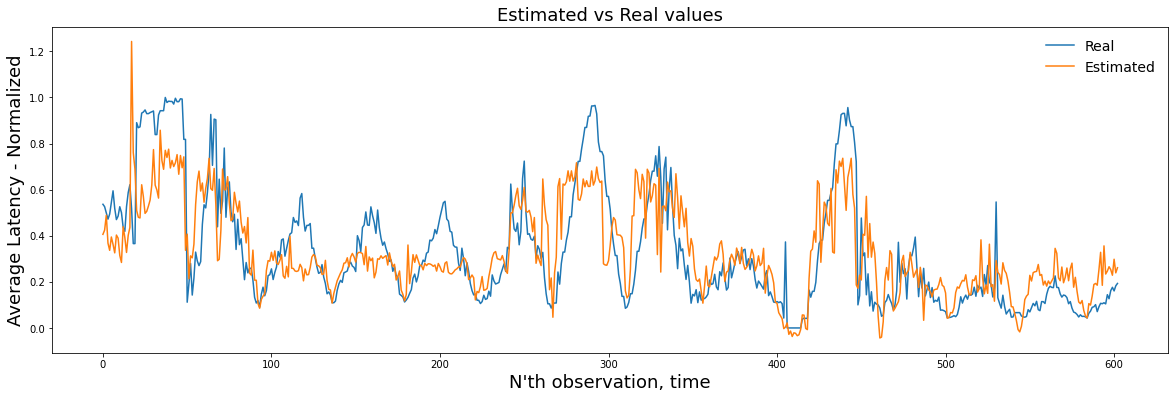

In [128]:
timeline_plot(y_train, y_pred_train)

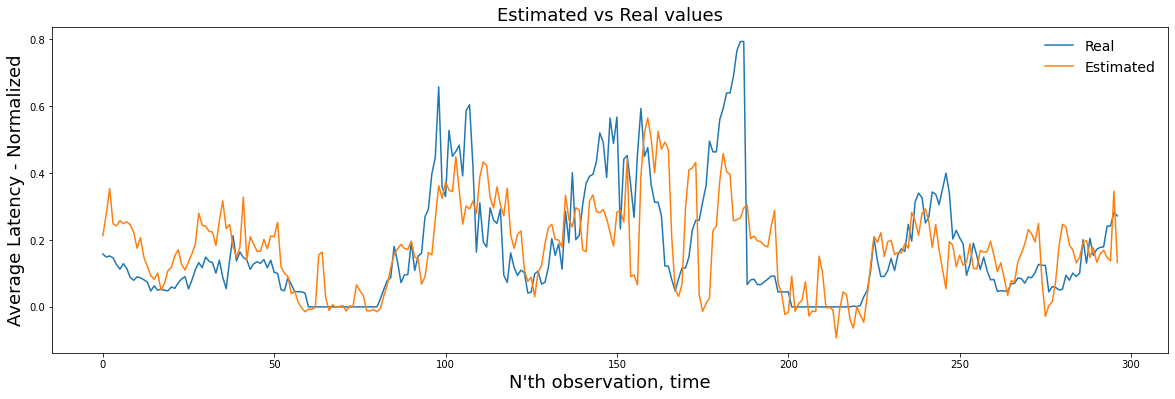

In [129]:
timeline_plot(y_test, y_pred_test)

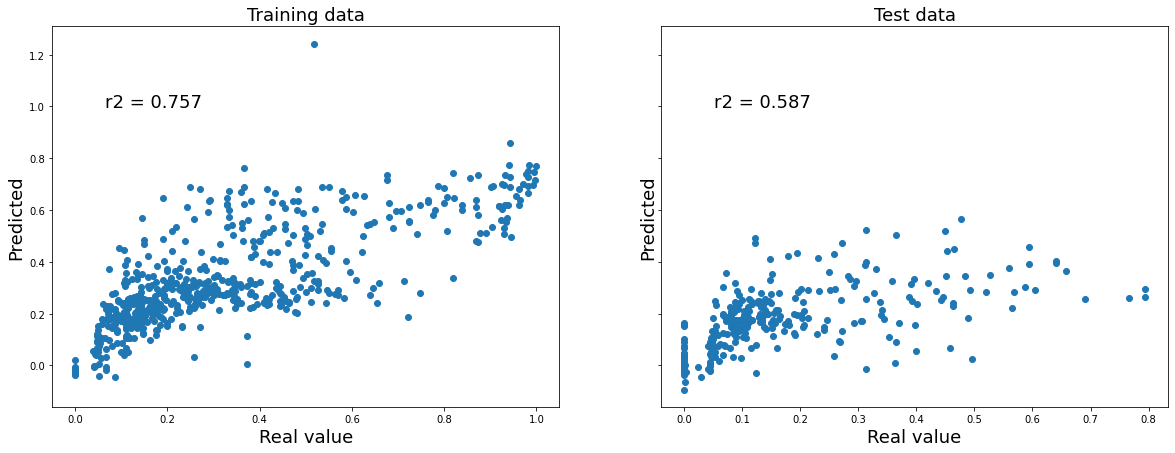

In [130]:
train_test_real_predicted_scatter(y_train, y_test, y_pred_train, y_pred_test)

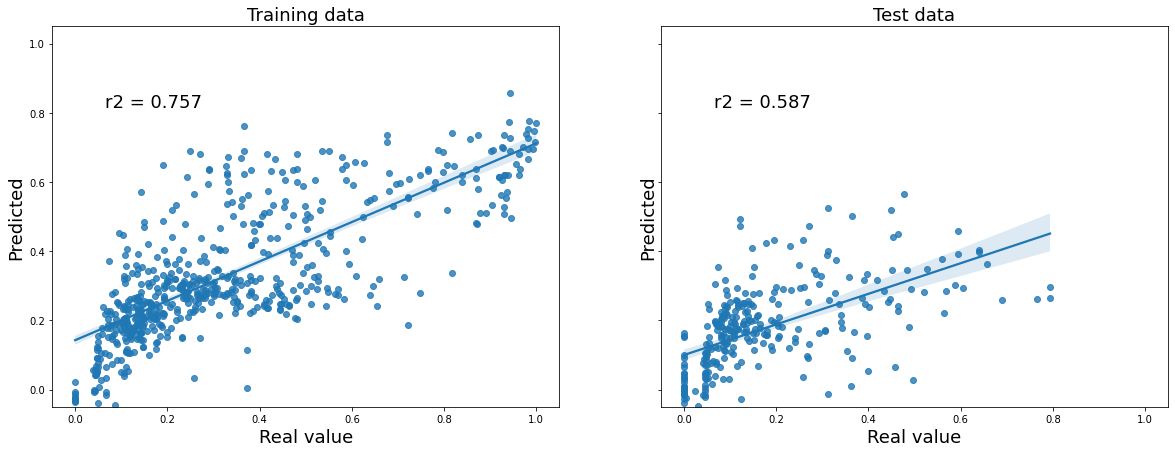

In [131]:
train_test_real_predicted_scatter_sns(y_train, y_test, y_pred_train, y_pred_test)

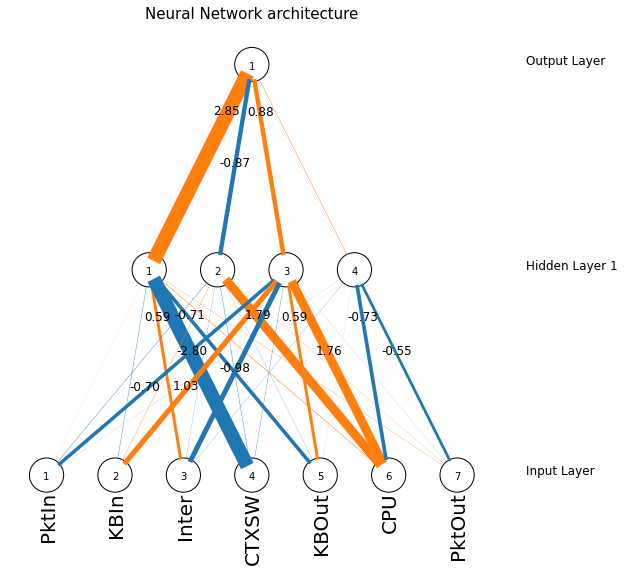

In [132]:
# Define the structure of the network
network_structure = np.hstack(([len(columns)], np.asarray(mlp.hidden_layer_sizes), [1]))

# Draw the Neural Network with weights
network=DrawNN(network_structure, mlp.coefs_, columns)
# network=DrawNN([3,4,1])
network.draw()

## # NN request rate nélkül laggal

In [133]:
ba.columns

Index(['timestamp', 'PktIn', 'KBIn', 'AVG_RR', 'Inter', 'CTXSW', 'KBOut',
       'CPU', 'SUM_RR', 'PktOut', 'vm_number', 'AVG_LAT_05', 'timestamp1',
       'PktIn1', 'KBIn1', 'AVG_RR1', 'Inter1', 'CTXSW1', 'KBOut1', 'CPU1',
       'SUM_RR1', 'PktOut1', 'vm_number1', 'AVG_LAT_051'],
      dtype='object')

In [134]:
columns = ['PktIn', 'KBIn', 'Inter', 'CTXSW', 'KBOut', 'CPU', 'PktOut',
           'PktIn1', 'KBIn1', 'Inter1', 'CTXSW1', 'KBOut1', 'CPU1', 'PktOut1']

X = ba[columns].values
y = ba['AVG_LAT_05']

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=1, shuffle=False)

activation_function = 'relu'        # tanh, relu, logistic

mlp = MLPRegressor(hidden_layer_sizes=4,
                           max_iter=1000,
                           activation=activation_function,
                           solver="lbfgs",
                           learning_rate="constant",
                           learning_rate_init=0.01,
                           alpha=0.01,
                           verbose=False,
                           momentum=0.9,
                           early_stopping=False,
                           tol=0.00000001,
                           shuffle=False,
                           n_iter_no_change=2000,
                           random_state=1234)


mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test  = mlp.predict(X_test)

r2_train = np.corrcoef(y_train.ravel(), y_pred_train)[0,1]
r2_test  = np.corrcoef(y_test.ravel(), y_pred_test)[0,1]

print('r2 train = ', r2_train)
print('r2 test  = ', r2_test)

r2 train =  0.6702075334964429
r2 test  =  0.45303357330152333


In [135]:
load = False
model = '2_model.sav'
if (load == True):
  mlp = load_mplp(model)
else:
  save_mlp(model)

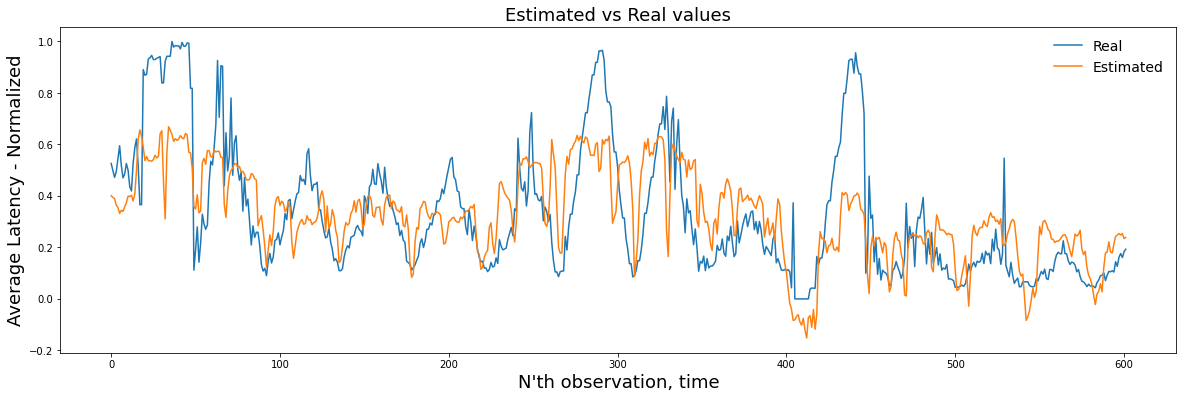

In [136]:
timeline_plot(y_train, y_pred_train)

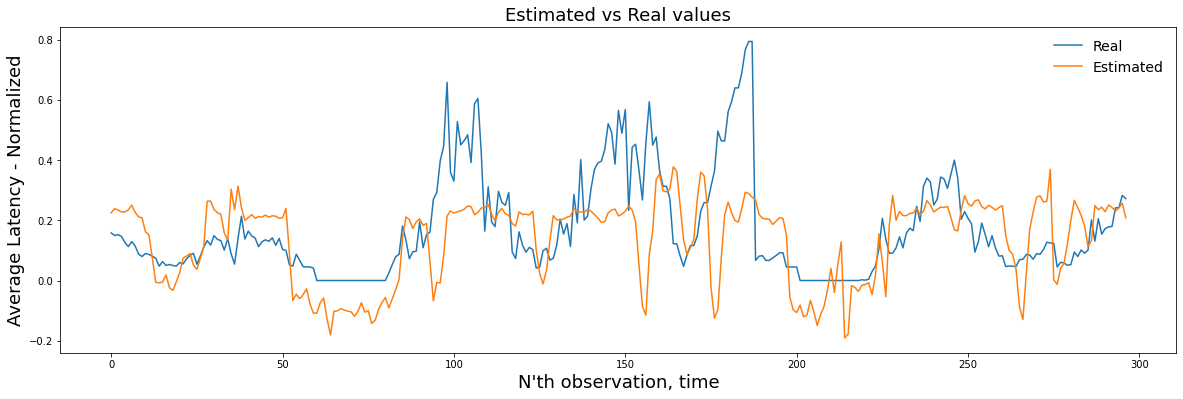

In [137]:
timeline_plot(y_test, y_pred_test)

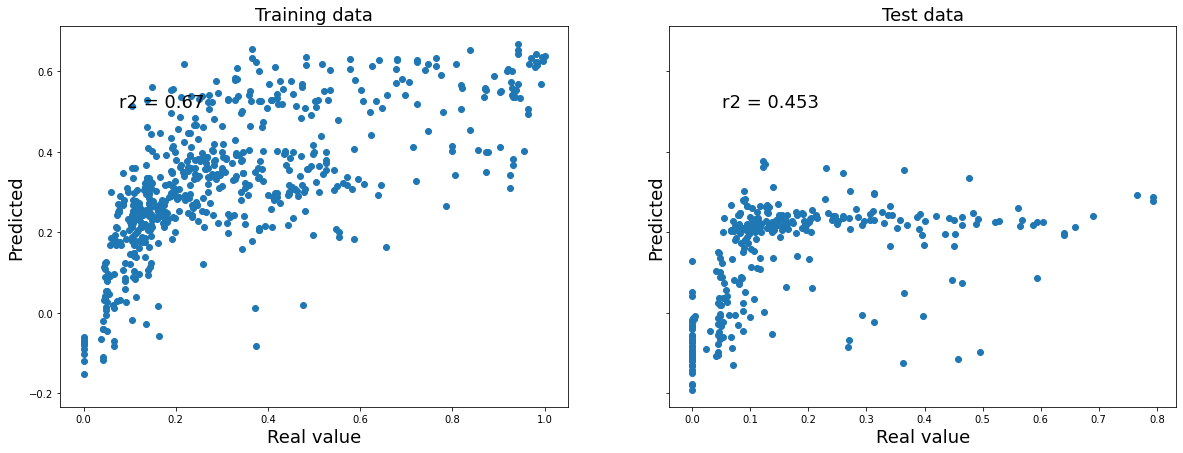

In [138]:
train_test_real_predicted_scatter(y_train, y_test, y_pred_train, y_pred_test)

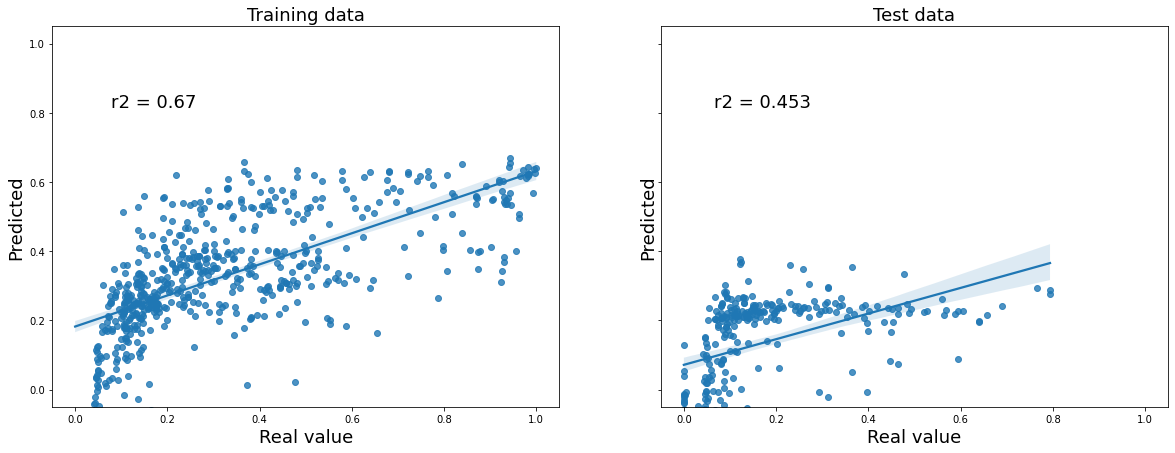

In [139]:
train_test_real_predicted_scatter_sns(y_train, y_test, y_pred_train, y_pred_test)

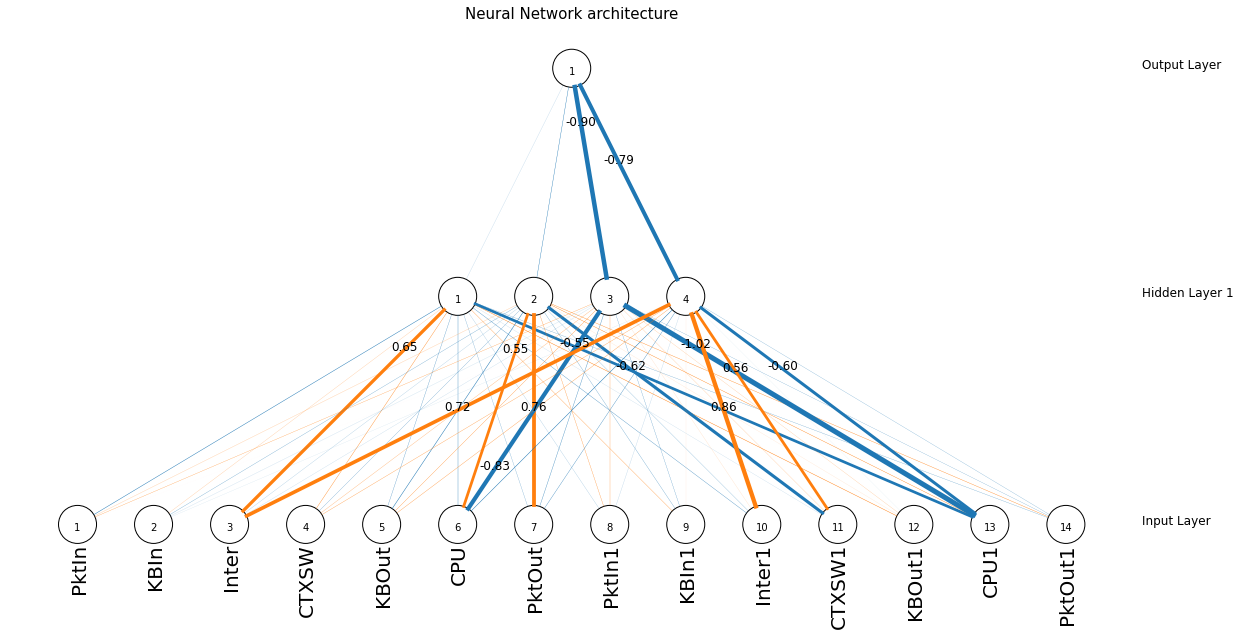

In [140]:
# Define the structure of the network
network_structure = np.hstack(([len(columns)], np.asarray(mlp.hidden_layer_sizes), [1]))

# Draw the Neural Network with weights
network=DrawNN(network_structure, mlp.coefs_, columns)
# network=DrawNN([3,4,1])
network.draw()

## # NN request rate nélkül laggal összetettem neurális hálóval

In [141]:
ba.columns

Index(['timestamp', 'PktIn', 'KBIn', 'AVG_RR', 'Inter', 'CTXSW', 'KBOut',
       'CPU', 'SUM_RR', 'PktOut', 'vm_number', 'AVG_LAT_05', 'timestamp1',
       'PktIn1', 'KBIn1', 'AVG_RR1', 'Inter1', 'CTXSW1', 'KBOut1', 'CPU1',
       'SUM_RR1', 'PktOut1', 'vm_number1', 'AVG_LAT_051'],
      dtype='object')

In [142]:
columns = ['PktIn', 'KBIn', 'Inter', 'CTXSW', 'KBOut', 'CPU', 'PktOut',
           'PktIn1', 'KBIn1', 'Inter1', 'CTXSW1', 'KBOut1', 'CPU1', 'PktOut1']

X = ba[columns].values
y = ba['AVG_LAT_05']

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=1, shuffle=False)

activation_function = 'tanh'        # tanh, relu, logistic

mlp = MLPRegressor(hidden_layer_sizes=(10,4),
                           max_iter=1000,
                           activation=activation_function,
                           solver="lbfgs",
                           learning_rate="constant",
                           learning_rate_init=0.01,
                           alpha=0.01,
                           verbose=False,
                           momentum=0.9,
                           early_stopping=False,
                           tol=0.00000001,
                           shuffle=False,
                           n_iter_no_change=2000,
                           random_state=1234)


mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test  = mlp.predict(X_test)

A_model_error_normalized = y_pred_train - y_train.ravel()
A_model_error = min_max_scaler.inverse_transform(y_pred_train.reshape(-1,1)) - min_max_scaler.inverse_transform(y_train)
A_model_error = A_model_error.ravel()
A_model_y_normalized = y_train.ravel()
A_model_y = min_max_scaler.inverse_transform(y_train).ravel()
A_model_predicted_y_normalized = y_pred_train.ravel()
A_model_predicted_y = min_max_scaler.inverse_transform(y_pred_train.reshape(-1,1)).ravel()


r2_train = np.corrcoef(y_train.ravel(), y_pred_train)[0,1]
r2_test  = np.corrcoef(y_test.ravel(), y_pred_test)[0,1]

print('r2 train = ', r2_train)
print('r2 test  = ', r2_test)

r2 train =  0.8904775132810387
r2 test  =  0.650131434229005


In [143]:
model = '3_model.sav'
if (load == True):
  mlp = load_mplp(model)
else:
  save_mlp(model)

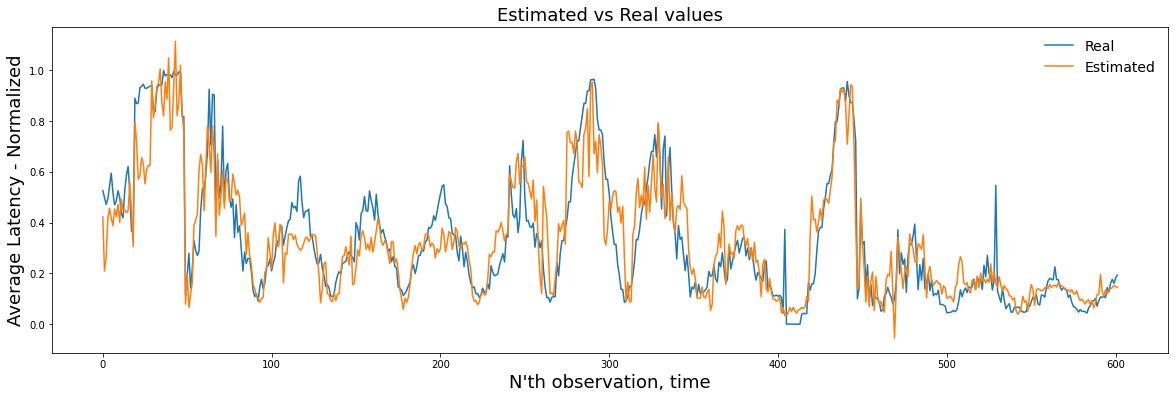

In [144]:
timeline_plot(y_train, y_pred_train)

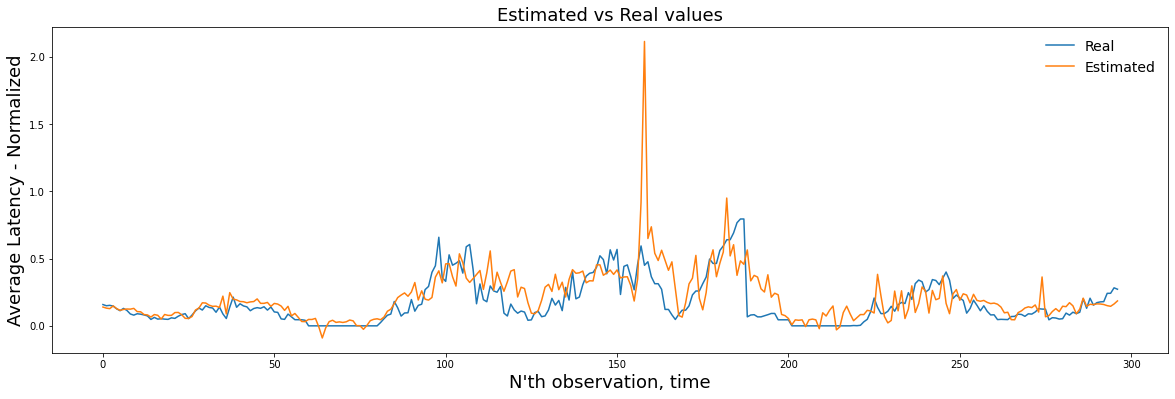

In [145]:
timeline_plot(y_test, y_pred_test)

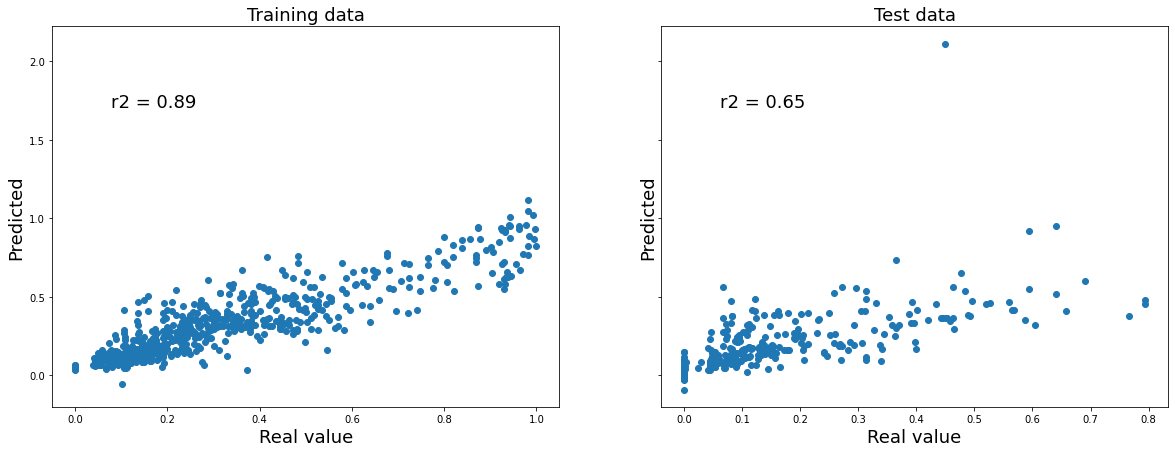

In [146]:
train_test_real_predicted_scatter(y_train, y_test, y_pred_train, y_pred_test)

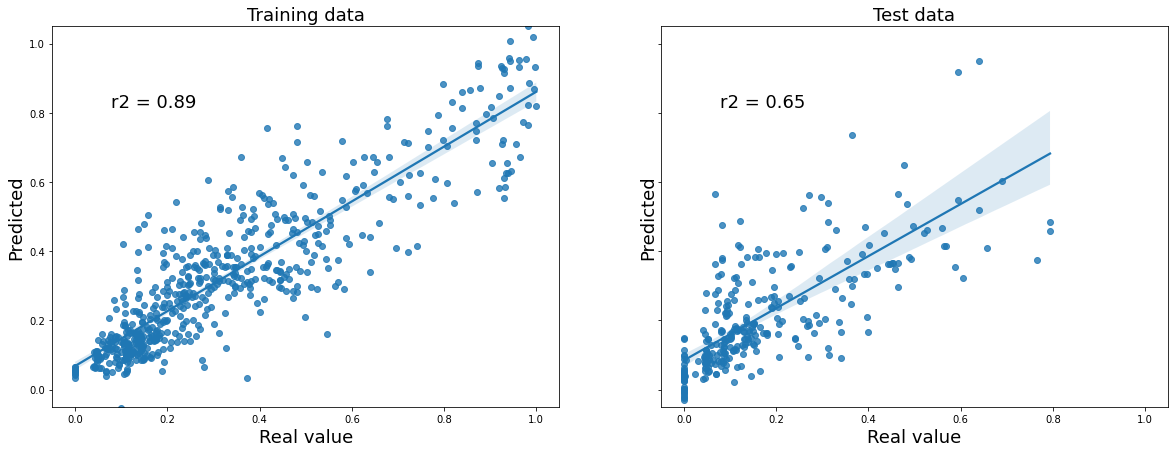

In [147]:
train_test_real_predicted_scatter_sns(y_train, y_test, y_pred_train, y_pred_test)

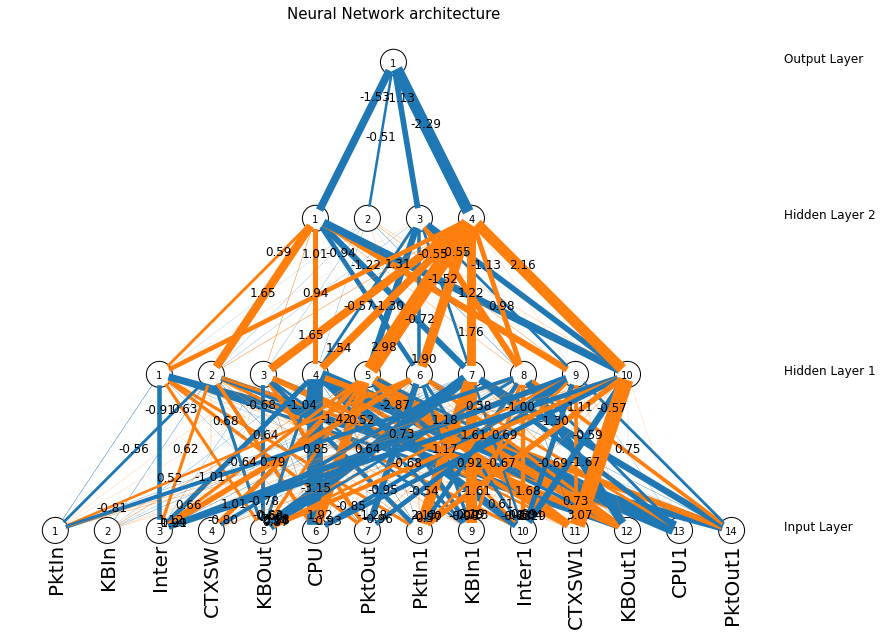

In [148]:
# Define the structure of the network
network_structure = np.hstack(([len(columns)], np.asarray(mlp.hidden_layer_sizes), [1]))

# Draw the Neural Network with weights
network=DrawNN(network_structure, mlp.coefs_, columns)
# network=DrawNN([3,4,1])
network.draw()

## # NN, lag nélkül és laggal

In [149]:
df.columns

Index(['timestamp', 'PktIn', 'KBIn', 'AVG_RR', 'Inter', 'CTXSW', 'KBOut',
       'CPU', 'SUM_RR', 'PktOut', 'vm_number', 'AVG_LAT_05'],
      dtype='object')

In [150]:
columns = ['AVG_RR', 'SUM_RR', 'PktIn', 'KBIn', 'Inter', 'CTXSW', 'KBOut', 'CPU', 'PktOut']

X = df[columns].values
y = df['AVG_LAT_05']

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=1, shuffle=False)

activation_function = 'relu'        # tanh, relu, logistic

mlp = MLPRegressor(hidden_layer_sizes=(10,4),
                           max_iter=500,
                           activation=activation_function,
                           solver="lbfgs",
                           learning_rate="constant",
                           learning_rate_init=0.01,
                           alpha=0.01,
                           verbose=False,
                           momentum=0.9,
                           early_stopping=False,
                           tol=0.00000001,
                           shuffle=False,
                           n_iter_no_change=2000,
                           random_state=1234)


mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test  = mlp.predict(X_test)
B_model_error_normalized = y_pred_train - y_train.ravel()
B_model_error = min_max_scaler.inverse_transform(y_pred_train.reshape(-1,1)) - min_max_scaler.inverse_transform(y_train)
B_model_error = B_model_error.ravel()
B_model_y_normalized = y_train.ravel()
B_model_y = min_max_scaler.inverse_transform(y_train).ravel()
B_model_predicted_y_normalized = y_pred_train.ravel()
B_model_predicted_y = min_max_scaler.inverse_transform(y_pred_train.reshape(-1,1)).ravel()

r2_train = np.corrcoef(y_train.ravel(), y_pred_train)[0,1]
r2_test  = np.corrcoef(y_test.ravel(), y_pred_test)[0,1]

print('r2 train = ', r2_train)
print('r2 test  = ', r2_test)

r2 train =  0.892536492236413
r2 test  =  0.6024888389804552


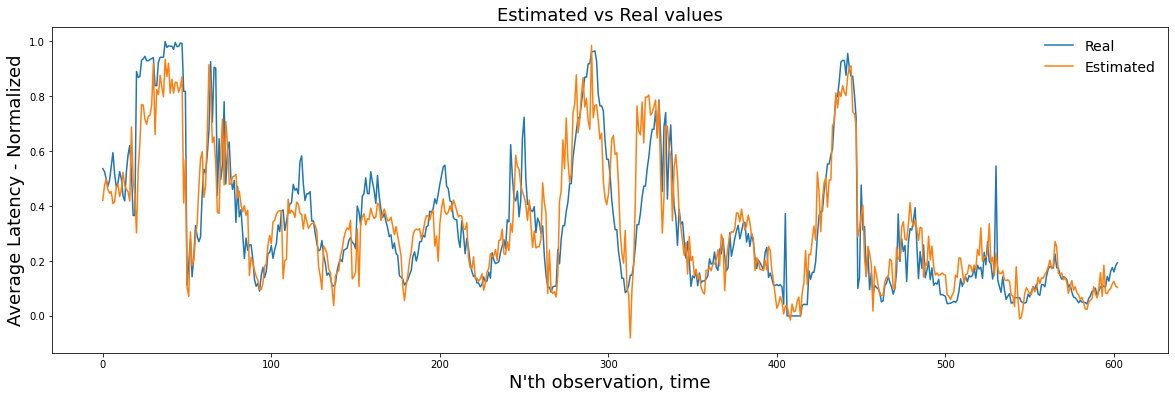

In [151]:
timeline_plot(y_train, y_pred_train)

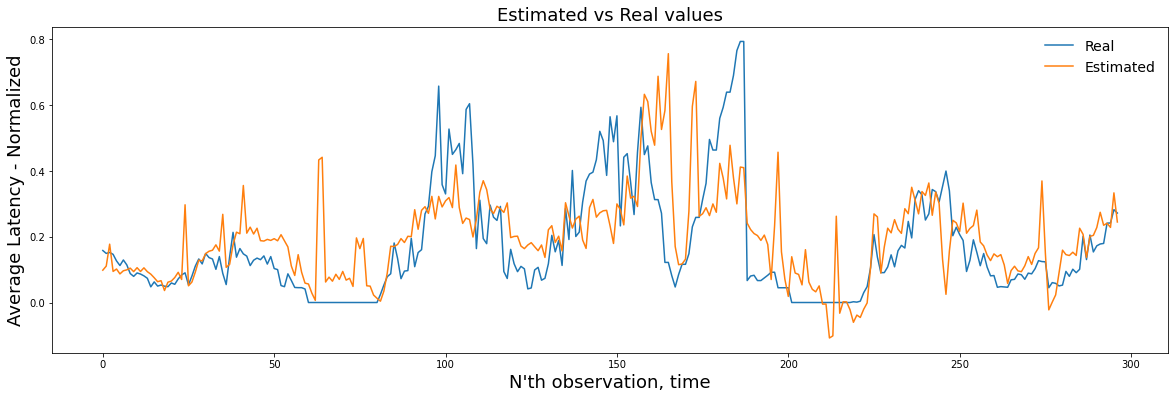

In [152]:
timeline_plot(y_test, y_pred_test)

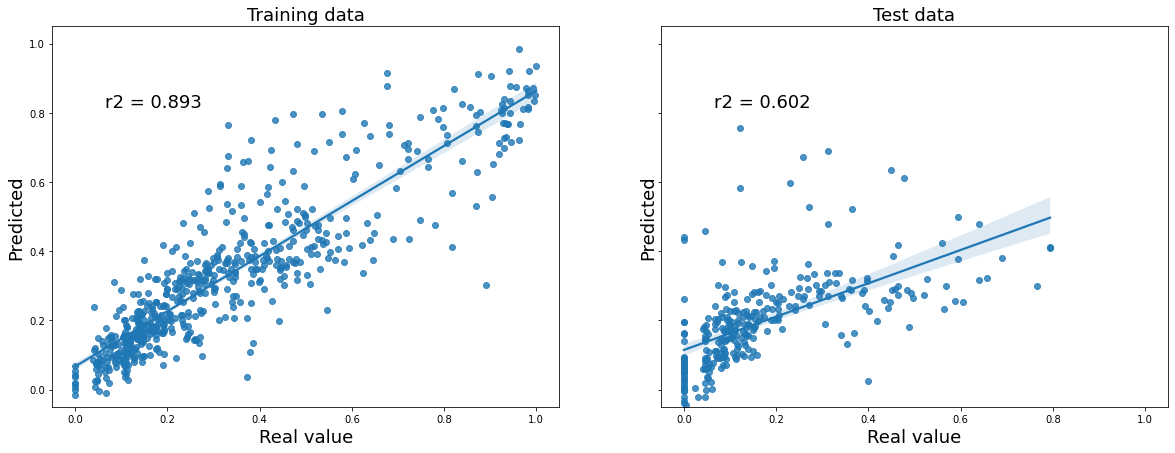

In [153]:
train_test_real_predicted_scatter_sns(y_train, y_test, y_pred_train, y_pred_test)

# Statisztka a szimulációs adatokon

In [154]:
!wget https://raw.githubusercontent.com/JoDeMiro/Data/main/Micado/AB_Method_Scale.csv

--2022-01-28 17:08:45--  https://raw.githubusercontent.com/JoDeMiro/Data/main/Micado/AB_Method_Scale.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10018 (9.8K) [text/plain]
Saving to: ‘AB_Method_Scale.csv.1’

AB_Method_Scale.csv 100%[===================>]   9.78K  --.-KB/s    in 0s      

2022-01-28 17:08:45 (59.7 MB/s) - ‘AB_Method_Scale.csv.1’ saved [10018/10018]



In [155]:
ab_stat_scale_db = pd.read_csv('AB_Method_Scale.csv', sep=';')

In [156]:
ab_stat_scale_db.head(3)

Method  Action
0       0       1
1       0       0
2       0       0

$$ \chi^{2} = \sum_{i=1}^{k} \frac{(x_i - m_i)^2}{m_i}$$

$$ \chi_{1}^{2} = \frac{(783 - 805)^2}{805} + \frac{(827 - 805)^2}{805} + \frac{(217 - 195)^2}{195} + \frac{(173 - 195)^2}{195} = 6.1665 $$

# Adatok generálása

Csak a próba kedvért két "futás" összehasolítása.

Itt az egyik a valós, a másik a Neurális háló által becsült érték (első 1000 érétke)

In [157]:
A_method_latency = min_max_scaler.inverse_transform(y_train)

In [158]:
A_method_latency = y_scaled

A_method_latency = min_max_scaler.inverse_transform(y_scaled)

A_last100 = A_method_latency[-100:]
A_last100_reserved = A_last100[::-1]
Lin = np.arange(0, 100, 1)
A_last100_reserved = A_last100_reserved + Lin.reshape(-1,1)
A_method_latency = np.concatenate((A_method_latency, A_last100_reserved), axis=0)

np.savetxt("A_method_latency.csv", A_method_latency, delimiter=",", fmt='%f')

In [159]:
y_pred_all  = mlp.predict(X_scaled)

B_method_latency = min_max_scaler.inverse_transform(y_pred_all.reshape(-1,1))

B_last100 = B_method_latency[-100:]
B_last100_reserved = B_last100[::-1]
B_method_latency = np.concatenate((B_method_latency, B_last100_reserved), axis=0)
B_method_latency = B_method_latency + 95

np.savetxt("B_method_latency.csv", B_method_latency, delimiter=",", fmt='%f')

# F-próba

$$F_{a,b} = \frac{\text{max}(SD_{a}^{2}, SD_{b}^{2})}{\text{min}(SD_{a}^{2}, SD_{b}^{2})}$$

$$F_{(1000,1000)} = \frac{\text{max}(40345, 31920)}{\text{min}(40345, 31920)} = \frac{40345}{31920} = 1.263$$

In [160]:
np.var(A_method_latency)
np.var(B_method_latency)
np.var(A_method_latency)/np.var(B_method_latency)

# np.std(A_method_latency)
# np.std(B_method_latency)
np.std(A_method_latency)/np.std(B_method_latency)

1.1242415875896623

In [161]:
F = np.var(A_method_latency)/np.var(B_method_latency)
print('F = ', F)

df1 = A_method_latency.size
df2 = B_method_latency.size

alpha = 0.05 # alfa szint
p_value = scipy.stats.f.cdf(F, df1, df2)
print('p_value = ', p_value)
if p_value > alpha:
  print('Reject the null hypothesis that Var(X) == Var(Y)')
    # Reject the null hypothesis that Var(X) == Var(Y)

F =  1.263919147266124
p_value =  0.9998914152081899
Reject the null hypothesis that Var(X) == Var(Y)


In [162]:
import scipy.stats as stats

stats.f_oneway(A_method_latency, B_method_latency)

F_onewayResult(statistic=array([136.65021469]), pvalue=array([1.38937962e-30]))

In [163]:
a = A_method_latency
b = B_method_latency

f_critical = 0.05
print('Variance a={0:.3f}, Variance b={1:.3f}'.format(np.var(a, ddof=1), np.var(b, ddof=1)))
fstatistics = np.var(a, ddof=1)/np.var(b, ddof=1) # because we estimate mean from data
fdistribution = stats.f(len(a)-1,len(b)-1) # build an F-distribution object
p_value = 2*min(fdistribution.cdf(f_critical), 1-fdistribution.cdf(f_critical))
f_critical1 = fdistribution.ppf(0.025)
f_critical2 = fdistribution.ppf(0.975)
print(fstatistics,f_critical1, f_critical2 )
if (p_value<0.05):
    print('Reject H0', p_value)
else:
    print('Cant Reject H0', p_value)

Variance a=40345.550, Variance b=31920.990
1.263919147266124 0.8832987168478774 1.1321198377470543
Reject H0 0.0


In [164]:
import scipy.stats as st

def f_test(x, y, alt="two_sided"):
    """
    Calculates the F-test.
    :param x: The first group of data
    :param y: The second group of data
    :param alt: The alternative hypothesis, one of "two_sided" (default), "greater" or "less"
    :return: a tuple with the F statistic value and the p-value.
    """
    df1 = len(x) - 1
    df2 = len(y) - 1
    f = x.var() / y.var()
    if alt == "greater":
        p = 1.0 - st.f.cdf(f, df1, df2)
    elif alt == "less":
        p = st.f.cdf(f, df1, df2)
    else:
        # two-sided by default
        # Crawley, the R book, p.355
        p = 2.0*(1.0 - st.f.cdf(f, df1, df2))
    return f, p

f_test(A_method_latency, B_method_latency)

f_test(B_method_latency, A_method_latency, alt="less")


(0.7911898495746464, 0.00010937892047405227)

# T-próba

$$t = \frac{\bar a - \bar b}{   SD_p \cdot    \sqrt{\frac{1}{n} + \frac{1}{m}}    } = \frac{\bar a - \bar b}{SD_p} \cdot \sqrt{\frac{nm}{n+m}}$$

$$SD_{p}^{2} = \frac{(n-1) \cdot SD_{a}^{2} + (m-1) \cdot SD_{b}^{2}}{n + m - 2}$$

$$t = \frac{332.3 - 232.9}{   189.99 \cdot    \sqrt{\frac{1}{1000} + \frac{1}{1000}}    } = \frac{332.3 - 232.9}{189.99} \cdot \sqrt{\frac{1000\cdot1000}{1000+1000}} = 11.695$$

$$SD_{p}^{2} = \frac{(1000 - 1) \cdot 31889 + (1000-1) \cdot 40305}{1000 + 1000 - 2}$$



In [165]:
print(np.var(A_method_latency))
print(np.var(B_method_latency))
print(np.mean(A_method_latency))
print(np.mean(B_method_latency))

40305.20445463607
31889.068649538884
232.89941785714285
332.27365072186115


In [166]:
a = A_method_latency
b = B_method_latency

sd_p = np.sqrt((999*np.var(a) + 999*np.var(b))/(1998))
print('sd_p = ', sd_p)

t1 = (np.mean(a) - np.mean(b)) / sd_p
print('t1 = ', t1)
t2 = np.sqrt((1000*1000)/(2000))
print('t2 = ', t2)
t = t1 * t2
print('t = ', t)

sd_p =  189.99246446132403
t1 =  -0.5230430225033872
t2 =  22.360679774997898
t =  -11.69559753474526


In [167]:
import scipy.stats as stats

stats.ttest_ind(A_method_latency, B_method_latency)


Ttest_indResult(statistic=array([-11.68974827]), pvalue=array([1.38937962e-30]))

# Mann-Whitney U-próba

In [168]:
import scipy.stats as stats

stats.mannwhitneyu(A_method_latency, B_method_latency)

MannwhitneyuResult(statistic=303518.0, pvalue=1.3912295961235907e-52)

## Histogramm

In [169]:
from scipy.stats import kurtosis
from scipy.stats import skew

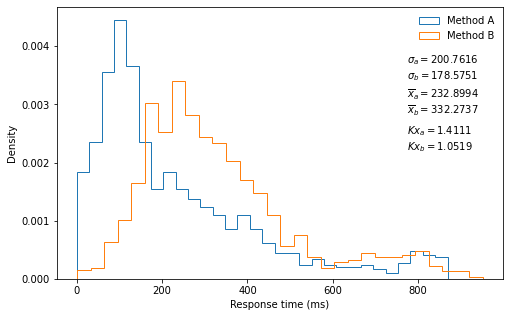

In [170]:
res_a1 = A_method_latency
res_b1 = B_method_latency

latex_std = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))
))

latex_mean = '\n'.join((
    r'$\overline{x}_a=%.4f$' % (np.mean(res_a1)),
    r'$\overline{x}_b=%.4f$' % (np.mean(res_b1))
))

latex_kurtosis = '\n'.join((
    r'$K{x}_a=%.4f$' % (kurtosis(res_a1)),
    r'$K{x}_b=%.4f$' % (kurtosis(res_b1))
))




plt.figure(figsize=(8, 5))

plt.hist(res_a1, bins=30, density=True, histtype='step', label='Method A')
plt.hist(res_b1, bins=30, density=True, histtype='step', label='Method B')
plt.legend(loc='upper right', frameon=False)
plt.text(0.05, 0.71, latex_std, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.58, latex_mean, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.45, latex_kurtosis, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('Density')
plt.xlabel('Response time (ms)')
# plt.text(0.5, -0.25, '$\sum_{j=0}^{+\infty} A_{j}$', ha='center')
plt.savefig('AB_Histogram.png')
plt.show()

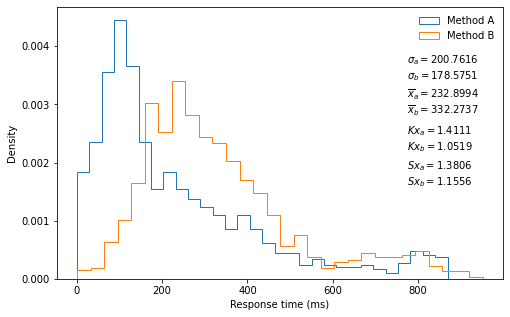

In [171]:
res_a1 = A_method_latency
res_b1 = B_method_latency

latex_std = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))
))

latex_mean = '\n'.join((
    r'$\overline{x}_a=%.4f$' % (np.mean(res_a1)),
    r'$\overline{x}_b=%.4f$' % (np.mean(res_b1))
))

latex_kurtosis = '\n'.join((
    r'$K{x}_a=%.4f$' % (kurtosis(res_a1)),
    r'$K{x}_b=%.4f$' % (kurtosis(res_b1))
))

latex_skew = '\n'.join((
    r'$S{x}_a=%.4f$' % (skew(res_a1)),
    r'$S{x}_b=%.4f$' % (skew(res_b1))
))


plt.figure(figsize=(8, 5))

plt.hist(res_a1, bins=30, density=True, histtype='step', label='Method A')
plt.hist(res_b1, bins=30, density=True, histtype='step', label='Method B')
plt.legend(loc='upper right', frameon=False)
plt.text(0.05, 0.71, latex_std, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.58, latex_mean, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.45, latex_kurtosis, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.32, latex_skew, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('Density')
plt.xlabel('Response time (ms)')
# plt.text(0.5, -0.25, '$\sum_{j=0}^{+\infty} A_{j}$', ha='center')
plt.savefig('AB_Histogram.png')
plt.show()

# Két másik mlp model A és B összehasonlítása a hibák alapján.



In [73]:

print(A_model_error.shape)
print(A_model_error_normalized.shape)
print(A_model_predicted_y_normalized.shape)
print(A_model_predicted_y.shape)
print(A_model_y.shape)
print(A_model_y_normalized.shape)

print(B_model_error.shape)
print(B_model_error_normalized.shape)
print(B_model_predicted_y_normalized.shape)
print(B_model_predicted_y.shape)
print(B_model_y.shape)
print(B_model_y_normalized.shape)


(602,)
(602,)
(602,)
(602,)
(602,)
(602,)
(603,)
(603,)
(603,)
(603,)
(603,)
(603,)


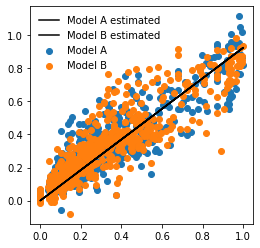

In [74]:
# Elöször a két becslés (model) összehasonlítása (scatter(pred,real))

# Azt vizsgáljuk, hogy a R2 alapján van-e különbség

# A corr képletét kell idetettenem

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


regression_a = LinearRegression(fit_intercept=False)
regression_a.fit(A_model_y_normalized.reshape(-1,1), A_model_predicted_y_normalized)
predicted_val_a = regression_a.predict(A_model_y_normalized.reshape(-1,1))
estimated_val_a = 0 + regression_a.coef_[0] * A_model_y_normalized

regression_b = LinearRegression(fit_intercept=False)
regression_b.fit(B_model_y_normalized.reshape(-1,1), B_model_predicted_y_normalized)
predicted_val_b = regression_b.predict(B_model_y_normalized.reshape(-1,1))
estimated_val_b = 0 + regression_b.coef_[0] * B_model_y_normalized

plt.figure(figsize=(4, 4))
plt.scatter(A_model_y_normalized, A_model_predicted_y_normalized, label = 'Model A')
plt.plot(A_model_y_normalized, estimated_val_a, color='black', label = 'Model A estimated')

plt.scatter(B_model_y_normalized, B_model_predicted_y_normalized, label = 'Model B')
plt.plot(B_model_y_normalized, estimated_val_b, color='black', label = 'Model B estimated')

plt.legend(frameon=False)
plt.show()



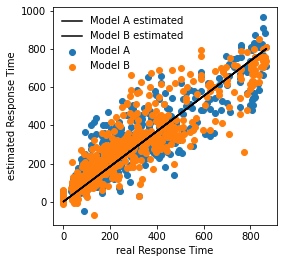

corr coef A =  0.922930397832138
corr coef B =  0.924760967371575


In [75]:
# Elöször a két becslés (model) összehasonlítása (scatter(pred,real))

# Azt vizsgáljuk, hogy a R2 alapján van-e különbség

# A corr képletét kell idetettenem

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


regression_a = LinearRegression(fit_intercept=False)
regression_a.fit(A_model_y.reshape(-1,1), A_model_predicted_y)
predicted_val_a = regression_a.predict(A_model_y.reshape(-1,1))
estimated_val_a = 0 + regression_a.coef_[0] * A_model_y

regression_b = LinearRegression(fit_intercept=False)
regression_b.fit(B_model_y.reshape(-1,1), B_model_predicted_y)
predicted_val_b = regression_b.predict(B_model_y.reshape(-1,1))
estimated_val_b = 0 + regression_b.coef_[0] * B_model_y

plt.figure(figsize=(4, 4))
plt.scatter(A_model_y, A_model_predicted_y, label = 'Model A')
plt.plot(A_model_y, estimated_val_a, color='black', label = 'Model A estimated')

plt.scatter(B_model_y, B_model_predicted_y, label = 'Model B')
plt.plot(B_model_y, estimated_val_b, color='black', label = 'Model B estimated')

plt.xlabel('real Response Time')
plt.ylabel('estimated Response Time')
plt.legend(frameon=False)
plt.show()

print('corr coef A = ', regression_a.coef_[0])
print('corr coef B = ', regression_b.coef_[0])



In [76]:
cc = regression_b.coef_[0]

t = cc * np.sqrt((1000-2)/(1-cc**2))

print('t test stat for corr = ', t)

t test stat for corr =  76.7688010976334


$$r_{X, Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{(n-1)S_XS_Y}$$

$$ X = predicted $$
$$ Y = real value $$

Az r-hez tartozó t-statisztika:

$$t = r \cdot \sqrt{\frac{n-2}{1-r^2}}$$

$$t = 0.924 \cdot \sqrt{\frac{1000-2}{1-0.8551}} = 76.768$$

$$t = r \cdot \sqrt{\frac{n-2}{1-r^2}} = 0.924 \cdot \sqrt{\frac{1000-2}{1-0.8551}} = 76.768$$


In [77]:
from scipy.stats import pearsonr

print(pearsonr(A_model_y, A_model_predicted_y))
print(pearsonr(B_model_y, B_model_predicted_y))



(0.8904775132810394, 2.428375874576893e-207)
(0.8925364922364131, 5.0962133804750164e-210)


# A Residuálisok ábrázolása a valós és az becsült függvényében

És itt azt vizsgáljuk, hogy ezek eloszlása homogén-e a másik változó függvényében.

In [87]:
print(A_model_error.shape)
print(A_model_predicted_y.shape)
print(A_model_y.shape)

print(B_model_error.shape)
print(B_model_predicted_y.shape)
print(B_model_y.shape)

(602,)
(602,)
(602,)
(603,)
(603,)
(603,)


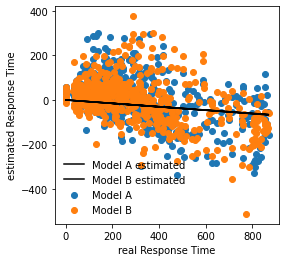

corr coef A =  -0.07706960216786206
corr coef B =  -0.07523903262842532
A persons corr = -0.455277, p = 0.000000
B persons corr = -0.450234, p = 0.000000


In [98]:
# A_model_y alapján tudjuk becsüli a A_model_error-t?

# Ha igen az baj.

regression_a = LinearRegression(fit_intercept=False)
regression_a.fit(A_model_y.reshape(-1,1), A_model_error)
predicted_val_a = regression_a.predict(A_model_y.reshape(-1,1))
estimated_val_a = 0 + regression_a.coef_[0] * A_model_y

regression_b = LinearRegression(fit_intercept=False)
regression_b.fit(B_model_y.reshape(-1,1), B_model_error)
predicted_val_b = regression_b.predict(B_model_y.reshape(-1,1))
estimated_val_b = 0 + regression_b.coef_[0] * B_model_y

plt.figure(figsize=(4, 4))
plt.scatter(A_model_y, A_model_error, label = 'Model A')
plt.plot(A_model_y, estimated_val_a, color='black', label = 'Model A estimated')

plt.scatter(B_model_y, B_model_error, label = 'Model B')
plt.plot(B_model_y, estimated_val_b, color='black', label = 'Model B estimated')

plt.xlabel('real Response Time')
plt.ylabel('estimated Response Time')
plt.legend(frameon=False)
plt.show()

print('corr coef A = ', regression_a.coef_[0])
print('corr coef B = ', regression_b.coef_[0])

corrA, pA = pearsonr(A_model_y, A_model_error)
corrB, pB = pearsonr(B_model_y, B_model_error)
print('A persons corr = {:5f}, p = {:5f}'.format(corrA, pA))
print('B persons corr = {:5f}, p = {:5f}'.format(corrB, pB))



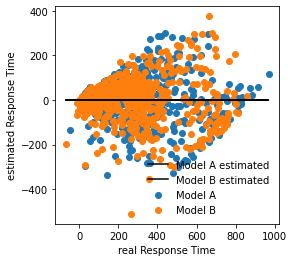

corr coef A =  -0.0009227129926470771
corr coef B =  -0.0005365980380889489
A persons corr = -0.000281, p = 0.994514
B persons corr = 0.000831, p = 0.983761


In [100]:
# A_model_predicted_y alapján tudjuk becsüli a A_model_error-t?

# Ha igen az baj.

regression_a = LinearRegression(fit_intercept=False)
regression_a.fit(A_model_predicted_y.reshape(-1,1), A_model_error)
predicted_val_a = regression_a.predict(A_model_predicted_y.reshape(-1,1))
estimated_val_a = 0 + regression_a.coef_[0] * A_model_predicted_y

regression_b = LinearRegression(fit_intercept=False)
regression_b.fit(B_model_predicted_y.reshape(-1,1), B_model_error)
predicted_val_b = regression_b.predict(B_model_predicted_y.reshape(-1,1))
estimated_val_b = 0 + regression_b.coef_[0] * B_model_predicted_y

plt.figure(figsize=(4, 4))
plt.scatter(A_model_predicted_y, A_model_error, label = 'Model A')
plt.plot(A_model_predicted_y, estimated_val_a, color='black', label = 'Model A estimated')

plt.scatter(B_model_predicted_y, B_model_error, label = 'Model B')
plt.plot(B_model_predicted_y, estimated_val_b, color='black', label = 'Model B estimated')

plt.xlabel('real Response Time')
plt.ylabel('estimated Response Time')
plt.legend(frameon=False)
plt.show()

print('corr coef A = ', regression_a.coef_[0])
print('corr coef B = ', regression_b.coef_[0])

corrA, pA = pearsonr(A_model_predicted_y, A_model_error)
corrB, pB = pearsonr(B_model_predicted_y, B_model_error)
print('A persons corr = {:5f}, p = {:5f}'.format(corrA, pA))
print('B persons corr = {:5f}, p = {:5f}'.format(corrB, pB))



# Nézzük meg a residuálisok elszlását

Ezeknek normális eloszlásúnak kell lenniük, null várható értékkel.


Az egyik legjobb könyv, amit szinte kötelező elolvasni ha témában bármit is szeretnék mondani:

### The resampled paired t test rész például

https://sci2s.ugr.es/keel/pdf/algorithm/articulo/dietterich1998.pdf



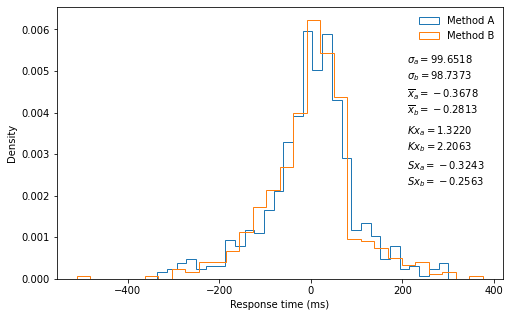

In [173]:
res_a1 = A_model_error
res_b1 = B_model_error

latex_std = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))
))

latex_mean = '\n'.join((
    r'$\overline{x}_a=%.4f$' % (np.mean(res_a1)),
    r'$\overline{x}_b=%.4f$' % (np.mean(res_b1))
))

latex_kurtosis = '\n'.join((
    r'$K{x}_a=%.4f$' % (kurtosis(res_a1)),
    r'$K{x}_b=%.4f$' % (kurtosis(res_b1))
))

latex_skew = '\n'.join((
    r'$S{x}_a=%.4f$' % (skew(res_a1)),
    r'$S{x}_b=%.4f$' % (skew(res_b1))
))


plt.figure(figsize=(8, 5))

plt.hist(res_a1, bins=30, density=True, histtype='step', label='Method A')
plt.hist(res_b1, bins=30, density=True, histtype='step', label='Method B')
plt.legend(loc='upper right', frameon=False)
plt.text(0.05, 0.71, latex_std, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.58, latex_mean, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.45, latex_kurtosis, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.text(0.05, 0.32, latex_skew, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'))
plt.ylabel('Density')
plt.xlabel('Response time (ms)')
# plt.text(0.5, -0.25, '$\sum_{j=0}^{+\infty} A_{j}$', ha='center')
plt.savefig('AB_Histogram.png')
plt.show()

# Bootstrap Pearsons

Sok sok mintát veszek, lemérem rajtuk a Pearson-féle korrelációt és azt T-próbának vetem alá.

In [78]:
Model_A_Pc = []
Model_B_Pc = []

for i in range(1000):
  idx_a = np.random.randint(A_model_y.size, size=100)
  idx_b = np.random.randint(B_model_y.size, size=100)

  m_a, _ = pearsonr(A_model_y[idx_a], A_model_predicted_y[idx_a])
  m_b, _ = pearsonr(B_model_y[idx_b], B_model_predicted_y[idx_b])
  Model_A_Pc.append(m_a)
  Model_B_Pc.append(m_b)


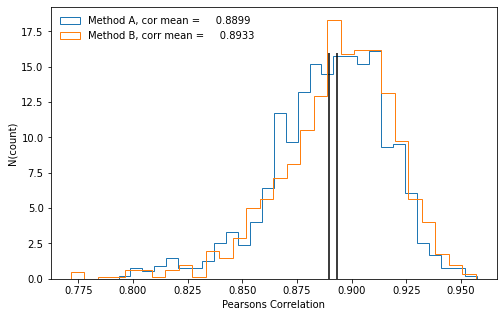

Ttest_indResult(statistic=2.9608342321307655, pvalue=0.0031042227940825573)

In [79]:
res_a1 = np.array(Model_A_Pc)
res_b1 = np.array(Model_B_Pc)

a1_mean = res_a1.mean()
b1_mean = res_b1.mean()

plt.figure(figsize=(8, 5))

plt.hist(res_a1, bins=30, density=True, histtype='step', label='Method A, cor mean = ' + str('{:10.4f}'.format(a1_mean)))
plt.hist(res_b1, bins=30, density=True, histtype='step', label='Method B, corr mean = ' + str('{:10.4f}'.format(b1_mean)))
plt.vlines(a1_mean, 0, 16)
plt.vlines(b1_mean, 0, 16)
plt.legend(loc='upper left', frameon=False)
plt.ylabel('N(count)')
plt.xlabel('Pearsons Correlation')
plt.savefig('AB_Corr_Bootstrap_Histogram.png')
plt.show()


stats.ttest_ind(Model_B_Pc, Model_A_Pc)

In [80]:
import scipy.stats as stats

stats.ttest_ind(Model_B_Pc, Model_A_Pc)

Ttest_indResult(statistic=2.9608342321307655, pvalue=0.0031042227940825573)

# Linear Regression model a prototípusban

$$\hat Y_{(k,t)} = w_0 + w_1Y_{k,t-1} + w_2VM + w_3(\Delta VM)$$


$$\hat Y_{(k,t)} = w_0 + w_1Y_{k,t-1} + w_2VM + w_3(\Delta VM) + w_4Y_{(j,t-1)}, \;\; H0: w_4 = 0, H1: w_4 \neq 0$$


# Linear Regression

Kitekintés - Numpy

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Linear Regression

Kitekintés - Numpy

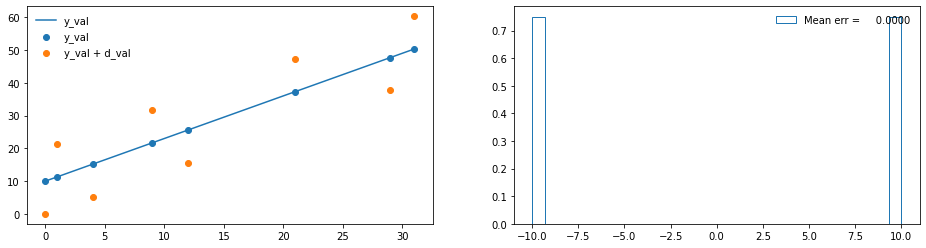

In [187]:
from sklearn.linear_model import LinearRegression

x_val = np.array([0, 1, 4, 9, 12, 21, 29, 31])

w0 = 10
w1 = 1.3
y_val = w0 + w1*x_val

d = 10
d_val = np.array([-d, d, -d, d, -d, d, -d, d])

s_val = y_val + d_val

error = (y_val - s_val)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 4))
ax0.plot(x_val, y_val, label = 'y_val')
ax0.scatter(x_val, y_val, label = 'y_val')
ax0.scatter(x_val, s_val, label = 'y_val + d_val')
ax0.legend(frameon=False)

ax1.hist(error, bins=30, density=True, histtype='step', label='Mean err = ' + str('{:10.4f}'.format(np.mean(error))))
ax1.legend(frameon=False)
plt.show()


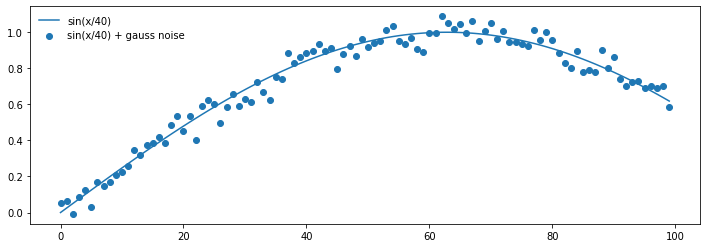

In [82]:
x_val = np.arange(0, 100, 1)

y_val = np.sin(x_val/40)

s_val = y_val + np.random.normal(0, 0.05, x_val.size)

plt.figure(figsize=(12, 4))
plt.plot(x_val, y_val, label = 'sin(x/40)')
plt.scatter(x_val, s_val, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

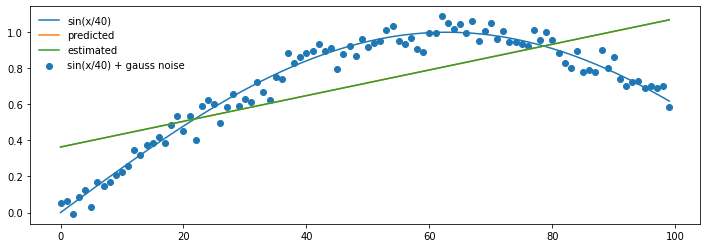

In [83]:
regression_1 = LinearRegression()

regression_1.fit(x_val.reshape(-1,1), s_val)

predicted_val = regression_1.predict(x_val.reshape(-1,1))

estimated_val = regression_1.intercept_ + regression_1.coef_[0] * x_val

plt.figure(figsize=(12, 4))
plt.plot(x_val, y_val, label = 'sin(x/40)')
plt.plot(x_val, predicted_val, label = 'predicted')
plt.plot(x_val, estimated_val, label = 'estimated')
plt.scatter(x_val, s_val, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

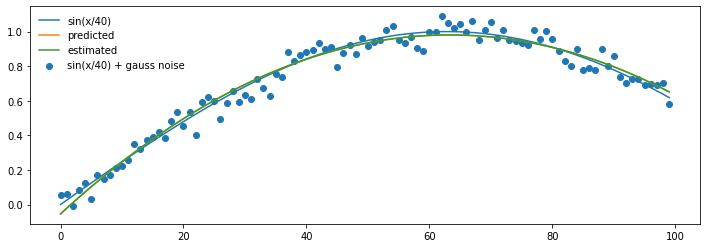

In [84]:
X_mat = np.array([x_val, x_val**2]).T

regression_2 = LinearRegression()

regression_2.fit(X_mat, s_val)

predicted_val = regression_2.predict(X_mat)

estimated_val = regression_2.intercept_ + np.sum(regression_2.coef_ * X_mat, axis=1)

plt.figure(figsize=(12, 4))
plt.plot(x_val, y_val, label = 'sin(x/40)')
plt.plot(x_val, predicted_val, label = 'predicted')
plt.plot(x_val, estimated_val, label = 'estimated')
plt.scatter(x_val, s_val, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

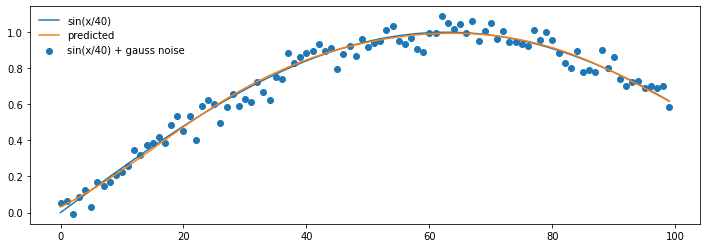

In [85]:
X_val = x_val.reshape(-1, 1)

X_val = X_val/X_val.max()

mlp_val = MLPRegressor(hidden_layer_sizes = (3, 3),
                   shuffle=False,
                   tol = 0.01,                                    # Ez a két paraméter különösen veszélyes, mert idő előtt leállítják a tanulást
                   momentum = 0.1,
                   nesterovs_momentum = True,
                   n_iter_no_change = 1000,                       # Ez a két paraméter különösen veszélyes, mert idő előtt leállítják a tanulást
                   # max_fun = 1000,
                   activation = 'logistic',
                   solver = 'adam',
                   random_state = 1,
                   learning_rate_init = 0.3,
                   max_iter = 2000000)


mlp_val.fit(X_val, y_val)

predicted_val = mlp_val.predict(X_val)

plt.figure(figsize=(12, 4))
plt.plot(x_val, y_val, label = 'sin(x/40)')
plt.plot(x_val, predicted_val, label = 'predicted')
plt.scatter(x_val, s_val, label = 'sin(x/40) + gauss noise')
plt.legend(frameon=False)
plt.show()

## Histogramm (from Loren)

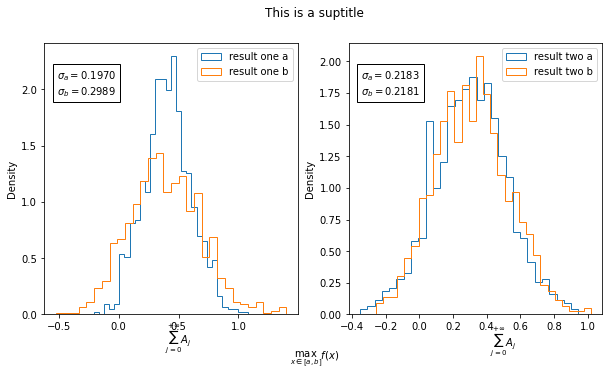

In [86]:
res_a1 = 0.2 * np.random.randn(1000) + 0.4
res_b1 = 0.3 * np.random.randn(1000) + 0.4
res_a2 = 0.21 * np.random.randn(1000) + 0.3
res_b2 = 0.22 * np.random.randn(1000) + 0.3

latextext1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))
))

latextext2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))
))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]
ax.hist(res_a1, bins=30, density=True, histtype='step', label='result one a')
ax.hist(res_b1, bins=30, density=True, histtype='step', label='result one b')
ax.legend(loc='upper right')
ax.text(0.05, 0.81, latextext1, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylabel('Density')
ax.text(0.5, -0.25, '$\sum_{j=0}^{+\infty} A_{j}$', ha='center')

ax = axes[1]
ax.hist(res_a2, bins=30, density=True, histtype='step', label='result two a')
ax.hist(res_b2, bins=30, density=True, histtype='step', label='result two b')
ax.legend(loc='upper right')
ax.text(0.05, 0.81, latextext2, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylabel('Density')
ax.text(0.5, -0.25, '$\sum_{j=0}^{+\infty} A_{j}$', ha='center')

fig.suptitle('This is a suptitle')
fig.text(0.5, -0.0, '$\max_{x \in [a,b]}f(x)$', ha='center')
plt.show()

# Max : $$\max_{x \in [a,b]}f(x)$$

# https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd